In [1]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np

phase3_collection = spike.EphysRecordingCollection("D:\\social_ephys_pilot2_cum\\proc\\Phase 3")
with open('phase3_collection.pkl','wb') as file:
    pickle.dump(phase3_collection, file)



In [2]:
with open('phase3_collection.pkl', 'rb') as file:
    phase3_collection = pickle.load(file)
phase3_collection.collection.keys()

dict_keys(['20230809_103121_1_merged.rec', '20230809_143303_1_merged.rec', '20230810_101534_1_merged.rec', '20230810_120856_1_merged.rec', '20230810_140909_1_merged.rec', '20230811_101635_1_merged.rec', '20230811_120331_merged.rec', '20230811_154219_1_merged.rec'])

In [3]:
p3d1_1_1 = phase3_collection.get_by_name('20230809_103121_1_merged.rec')
#p3d1_1_2 was only half as long so we will not do ephys data analysis on it 
p3d1_1_4 = phase3_collection.get_by_name('20230809_143303_1_merged.rec')

p3d2_1_1 = phase3_collection.get_by_name('20230810_101534_1_merged.rec')
p3d2_1_2 = phase3_collection.get_by_name('20230810_120856_1_merged.rec')
p3d2_1_4 = phase3_collection.get_by_name('20230810_140909_1_merged.rec')

p3d3_1_1 = phase3_collection.get_by_name('20230811_101635_1_merged.rec')
p3d3_1_2 = phase3_collection.get_by_name('20230811_120331_merged.rec')
p3d3_1_4 = phase3_collection.get_by_name('20230811_154219_1_merged.rec')


p3d1_1_1.subject = '1.1'
p3d1_1_4.subject = '1.4'
p3d2_1_1.subject = '1.1'
p3d2_1_2.subject = '1.2'
p3d2_1_4.subject = '1.4'
p3d3_1_1.subject = '1.1'
p3d3_1_2.subject = '1.2'
p3d3_1_4.subject = '1.4'


In [4]:
p3d1_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_103121_1_merged.rec\\20230809_103121_1.1_1t1bL_p3d1.xlsx")

p3d1_1_1_df = p3d1_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

last10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] > 1939]
first10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] < 601]
familiarization_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] < 1258) & (p3d1_1_1_df['Start (s)'] > 675)]
ITI_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] > 1271) & (p3d1_1_1_df['Start (s)'] < 1860)]

novel_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
fam_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
cagemate_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
empty_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)

cup3_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cup4_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cup2_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famempty_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
famfam_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1],['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

In [5]:
p3d1_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_143303_1_merged.rec\\20230809_143303_1.4_3t3bL_p3d1.xlsx")

p3d1_1_4_df = p3d1_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] > 1920]
first10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] < 602]
familiarization_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] < 1234) & (p3d1_1_4_df['Start (s)'] > 629)]
ITI_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] > 1260) & (p3d1_1_4_df['Start (s)'] < 1856)]
novel_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
fam_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
cagemate_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
empty_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup3_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cup4_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cup2_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famcup3_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
famfam_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIcup3_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

In [6]:
p3d2_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_101534_1_merged.rec\\20230810_101534_1.1_p3d2.xlsx")

p3d2_1_1_df = p3d2_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] > 1926]
first10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] < 600]
familiarization_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] < 1216) & (p3d2_1_1_df['Start (s)'] > 612)]
ITI_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] > 1222) & (p3d2_1_1_df['Start (s)'] < 1821)]

novel_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
fam_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cagemate_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
empty_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)

cup3_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cup4_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cup2_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

In [7]:
p3d2_1_2_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_120856_1_merged.rec\\20230810_120856_1.2_p3d2.xlsx")

p3d2_1_2_df = p3d2_1_2_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] > 2049]
first10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] < 723]
familiarization_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] < 1351) & (p3d2_1_2_df['Start (s)'] > 734)]
ITI_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] > 1373) & (p3d2_1_2_df['Start (s)'] < 1950)]

novel_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
fam_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cagemate_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
empty_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

cup3_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cup4_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cup2_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)


In [8]:
p3d2_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_140909_1_merged.rec\\20230810_140909_1.4_p3d2.xlsx")

p3d2_1_4_df = p3d2_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] > 1912]
first10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] < 621]
familiarization_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] < 1221) & (p3d2_1_4_df['Start (s)'] > 635)]
ITI_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] > 1234) & (p3d2_1_4_df['Start (s)'] < 1836)]

novel_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
fam_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cagemate_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
empty_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)

cup3_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cup4_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cup2_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

In [9]:
p3d3_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_101635_1_merged.rec\\1.1_p3d3.xlsx")

p3d3_1_1_df = p3d3_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] > 1903]
first10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] < 601]
familiarization_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] < 1208) & (p3d3_1_1_df['Start (s)'] > 608)]
ITI_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] > 1221) & (p3d3_1_1_df['Start (s)'] < 1809)]
novel_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
fam_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cagemate_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
empty_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
cup3_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cup4_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cup2_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famcup3_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
ITIcup3_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)

In [10]:
# 2572320.85 ms is the length of the recording of p3d3_1_2 
# media duration of second vid is 862200 ms
# diff in ms: 1710120.85
#this is the constant i add to every value in the array

p3d3_1_2_df1 = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_1.xlsx")
p3d3_1_2_df1 = p3d3_1_2_df1[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
first10min_1_2_df = p3d3_1_2_df1[p3d3_1_2_df1['Start (s)'] < 611]
familiarization_1_2_df = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] < 1230) & (p3d3_1_2_df1['Start (s)'] > 628)]
ITI_1_2_df1 = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] > 1244)]

cup3_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cup4_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cup2_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
ITIcup3_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)

p3d3_1_2_df2 = pd.read_excel("D:\\social_ephys_pilot2_cum\proc\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_2.xlsx")
p3d3_1_2_df2 = p3d3_1_2_df2[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_1_2_df = p3d3_1_2_df2[p3d3_1_2_df2['Start (s)'] > 259]
ITI_1_2_df2 = p3d3_1_2_df2[(p3d3_1_2_df2['Start (s)'] < 134)]

ITIcup3_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)

novel_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
fam_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cagemate_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
empty_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d3_1_2_array2 = ITIcup3_p3d3_1_2_array2 + 1710120.85
ITIfamcup_p3d3_1_2_array2 = ITIfamcup_p3d3_1_2_array2 + 1710120.85

novel_p3d3_1_2_array = novel_p3d3_1_2_array + 1710120.85
fam_p3d3_1_2_array = fam_p3d3_1_2_array + 1710120.85
cagemate_p3d3_1_2_array = cagemate_p3d3_1_2_array + 1710120.85
empty_p3d3_1_2_array = empty_p3d3_1_2_array + 1710120.85

ITIcup3_p3d3_1_2_array = np.concatenate([ITIcup3_p3d3_1_2_array1, ITIcup3_p3d3_1_2_array2])
ITIfamcup_p3d3_1_2_array = np.concatenate([ITIfamcup_p3d3_1_2_array1, ITIfamcup_p3d3_1_2_array2])



In [11]:
p3d3_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_154219_1_merged.rec\\20230811_154219_1.4_3t3bL_p3d3.xlsx")

p3d3_1_4_df = p3d3_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] > 1910]
first10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] < 605]
familiarization_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] < 1201) & (p3d3_1_4_df['Start (s)'] > 625)]
ITI_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] > 1211) & (p3d3_1_4_df['Start (s)'] < 1837)]

novel_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
fam_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
cagemate_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
empty_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)

cup3_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cup4_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cup2_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
famfam_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

In [12]:

events_p3d1_1_1 = {'cup 1': cup1_p3d1_1_1_array, 'cup 2': cup2_p3d1_1_1_array,
                   'cup 3': cup3_p3d1_1_1_array,'cup 4': cup4_p3d1_1_1_array,
                   'empty cup': famempty_p3d1_1_1_array, 'first fam': famfam_p3d1_1_1_array,
                   'empty ITI cup': ITIcup3_p3d1_1_1_array, 'ITI fam cup': ITIfamcup_p3d1_1_1_array,
                   'cagemate': cagemate_p3d1_1_1_array, 'empty': empty_p3d1_1_1_array,
                   'novel': novel_p3d1_1_1_array, 'familiar': fam_p3d1_1_1_array}
events_p3d1_1_4 = {'cup 1': cup1_p3d1_1_4_array, 'cup 2': cup2_p3d1_1_4_array,
                   'cup 3': cup3_p3d1_1_4_array,'cup 4': cup4_p3d1_1_4_array,
                   'empty cup': famcup3_p3d1_1_4_array, 'first fam': famfam_p3d1_1_4_array,
                   'empty ITI cup': ITIcup3_p3d1_1_4_array, 'ITI fam cup': ITIfamcup_p3d1_1_4_array,
                   'cagemate': cagemate_p3d1_1_4_array, 'empty': empty_p3d1_1_4_array,
                   'novel': novel_p3d1_1_4_array, 'familiar': fam_p3d1_1_4_array}

events_p3d2_1_1 = {'cup 1': cup1_p3d2_1_1_array, 'cup 2': cup2_p3d2_1_1_array,
                   'cup 3': cup3_p3d2_1_1_array,'cup 4': cup4_p3d2_1_1_array,
                   'empty cup': famcup3_p3d2_1_1_array, 'first fam': famfam_p3d2_1_1_array,
                   'empty ITI cup': ITIcup3_p3d2_1_1_array, 'ITI fam cup': ITIfamcup_p3d2_1_1_array,
                   'cagemate': cagemate_p3d2_1_1_array, 'empty': empty_p3d2_1_1_array,
                   'novel': novel_p3d2_1_1_array, 'familiar': fam_p3d2_1_1_array}
events_p3d2_1_2 = {'cup 1': cup1_p3d2_1_2_array, 'cup 2': cup2_p3d2_1_2_array,
                   'cup 3': cup3_p3d2_1_2_array,'cup 4': cup4_p3d2_1_2_array,
                   'empty cup': famcup3_p3d2_1_2_array, 'first fam': famfam_p3d2_1_2_array,
                   'empty ITI cup': ITIcup3_p3d2_1_2_array, 'ITI fam cup': ITIfamcup_p3d2_1_2_array,
                   'cagemate': cagemate_p3d2_1_2_array, 'empty': empty_p3d2_1_2_array,
                   'novel': novel_p3d2_1_2_array, 'familiar': fam_p3d2_1_2_array}
events_p3d2_1_4 = {'cup 1': cup1_p3d2_1_4_array, 'cup 2': cup2_p3d2_1_4_array,
                   'cup 3': cup3_p3d2_1_4_array,'cup 4': cup4_p3d2_1_4_array,
                   'empty cup': famcup3_p3d2_1_4_array, 'first fam': famfam_p3d2_1_4_array,
                   'empty ITI cup': ITIcup3_p3d2_1_4_array, 'ITI fam cup': ITIfamcup_p3d2_1_4_array,
                   'cagemate': cagemate_p3d2_1_4_array, 'empty': empty_p3d2_1_4_array,
                   'novel': novel_p3d2_1_4_array, 'familiar': fam_p3d2_1_4_array}

events_p3d3_1_1 = { 'cup 1':cup1_1_1_array, 'cup 2':cup2_1_1_array, 
                   'cup 3':cup3_1_1_array, 'cup 4': cup4_1_1_array, 
                   'empty cup':famcup3_1_1_array, 'first fam': famfam_1_1_array,  
                   'empty ITI cup': ITIcup3_1_1_array, 'ITI fam cup':ITIfamcup_1_1_array, 
                   'cagemate':cagemate_1_1_array,'empty':empty_1_1_array,
                   'novel':novel_1_1_array,'familiar':fam_1_1_array}
events_p3d3_1_2 = {'cup 1': cup1_p3d3_1_2_array, 'cup 2': cup2_p3d3_1_2_array,
                   'cup 3': cup3_p3d3_1_2_array,'cup 4': cup4_p3d3_1_2_array,
                   'empty cup': famcup3_p3d3_1_2_array, 'first fam': famfam_p3d3_1_2_array,
                   'empty ITI cup': ITIcup3_p3d3_1_2_array, 'ITI fam cup': ITIfamcup_p3d3_1_2_array,
                   'cagemate': cagemate_p3d3_1_2_array, 'empty': empty_p3d3_1_2_array,
                   'novel': novel_p3d3_1_2_array, 'familiar': fam_p3d3_1_2_array}
events_p3d3_1_4 = {'cup 1': cup1_p3d3_1_4_array, 'cup 2': cup2_p3d3_1_4_array,
                   'cup 3': cup3_p3d3_1_4_array,'cup 4': cup4_p3d3_1_4_array,
                   'empty cup': famcup3_p3d3_1_4_array, 'first fam': famfam_p3d3_1_4_array,
                   'empty ITI cup': ITIcup3_p3d3_1_4_array, 'ITI fam cup': ITIfamcup_p3d3_1_4_array,
                   'cagemate': cagemate_p3d3_1_4_array, 'empty': empty_p3d3_1_4_array,
                   'novel': novel_p3d3_1_4_array, 'familiar': fam_p3d3_1_4_array}


In [13]:
p3d1_1_1.event_dict = events_p3d1_1_1
p3d1_1_4.event_dict = events_p3d1_1_4

p3d2_1_1.event_dict = events_p3d2_1_1
p3d2_1_2.event_dict = events_p3d2_1_2
p3d2_1_4.event_dict = events_p3d2_1_4

p3d3_1_1.event_dict = events_p3d3_1_1
p3d3_1_2.event_dict = events_p3d3_1_2
p3d3_1_4.event_dict = events_p3d3_1_4

In [14]:
phase3_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, 100, 100, 0.5)

All set to analyze


In [15]:
p3d3_1_2.event_dict

{'cup 1': array([[     0.,   5067.],
        [ 81433.,  82400.],
        [155000., 160600.],
        [196000., 198100.],
        [259633., 264633.],
        [291333., 291900.],
        [506467., 516199.],
        [516200., 516833.]]),
 'cup 2': array([[139600., 140300.],
        [145567., 153200.],
        [266467., 269966.],
        [269967., 271800.],
        [277933., 278733.],
        [345500., 350067.]]),
 'cup 3': array([[ 70567.,  71567.],
        [320700., 329199.],
        [329200., 332700.],
        [398933., 400900.],
        [540767., 546300.],
        [547067., 552600.],
        [553167., 555599.],
        [555600., 562432.],
        [562433., 563067.],
        [565867., 568599.],
        [568600., 574233.]]),
 'cup 4': array([[ 58000.,  61000.],
        [ 90833.,  94399.],
        [ 94400., 102232.],
        [102233., 105800.],
        [302533., 305400.],
        [313067., 315333.],
        [369800., 370833.],
        [375700., 378499.],
        [378500., 379067.],
      

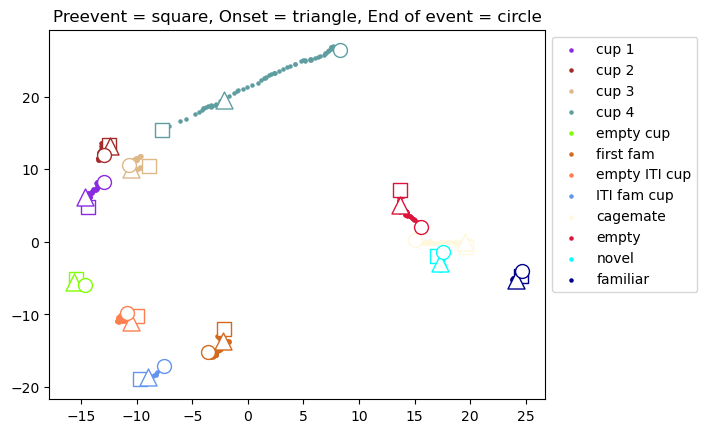

In [16]:
phase3_analysis.PCA_trajectories(5,2, save = True)



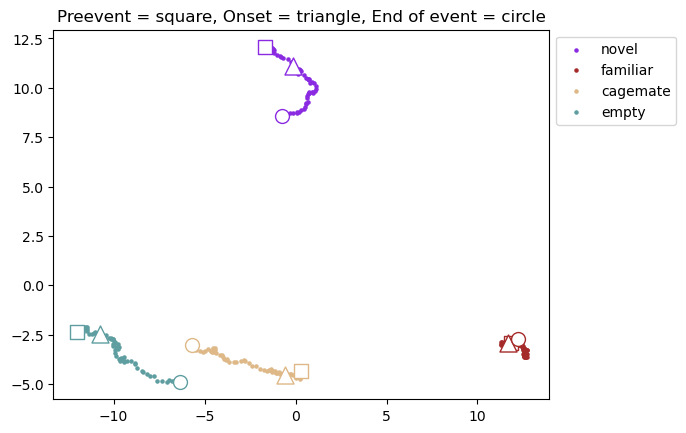

In [17]:
phase3_analysis.PCA_trajectories(5,2, events = ['novel', 'familiar', 'cagemate', 'empty'], save = True)

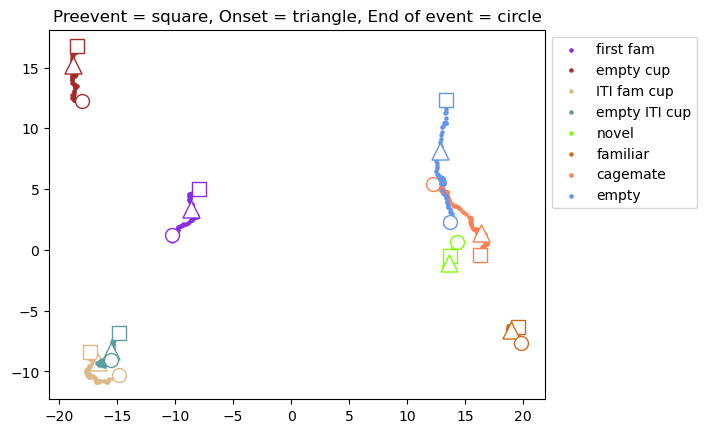

In [18]:
phase3_analysis.PCA_trajectories(5,2, events = ['first fam', 'empty cup', 'ITI fam cup', 'empty ITI cup', 'novel', 'familiar', 'cagemate', 'empty' ])

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

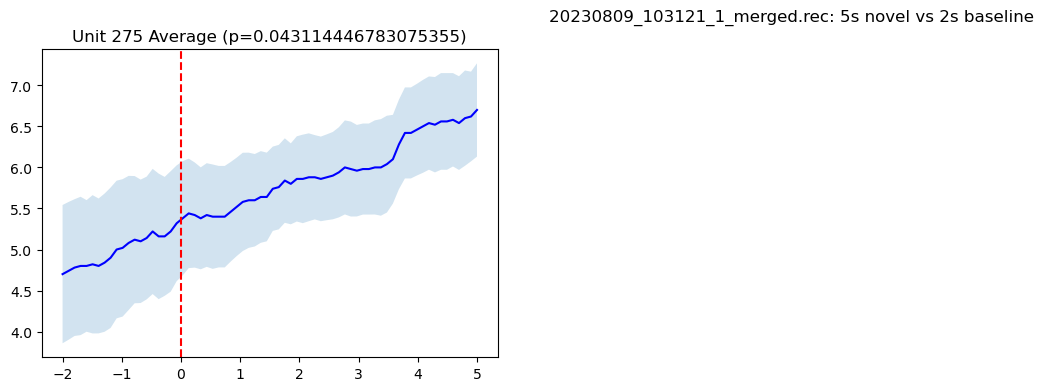

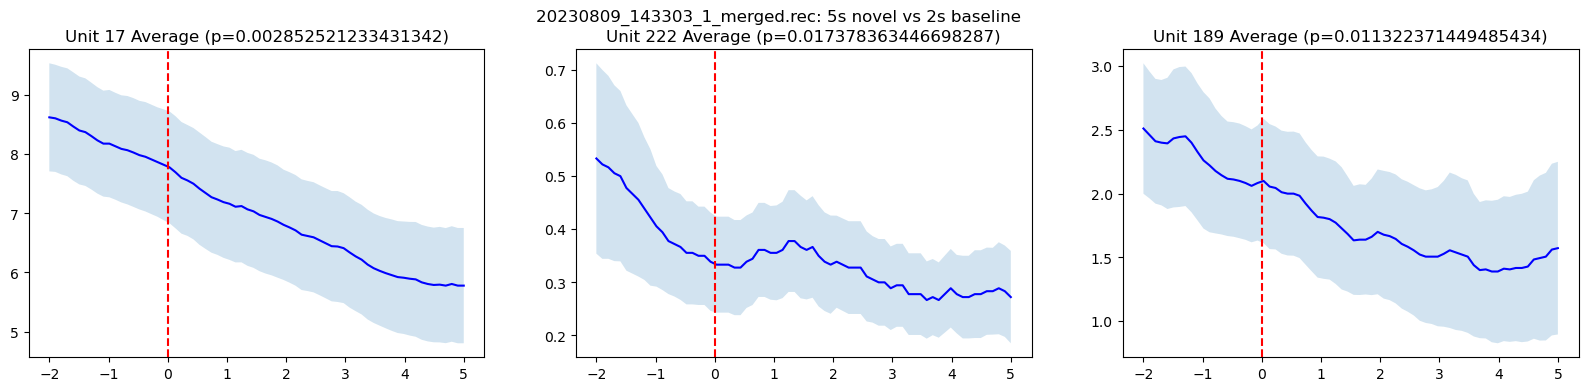

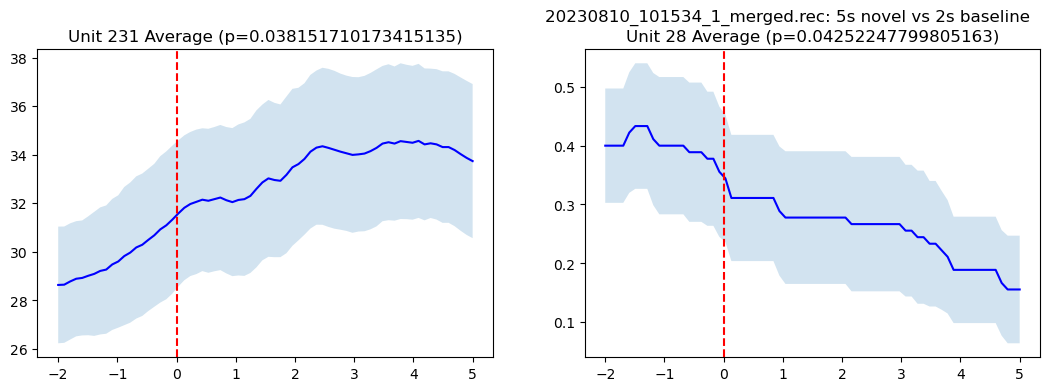

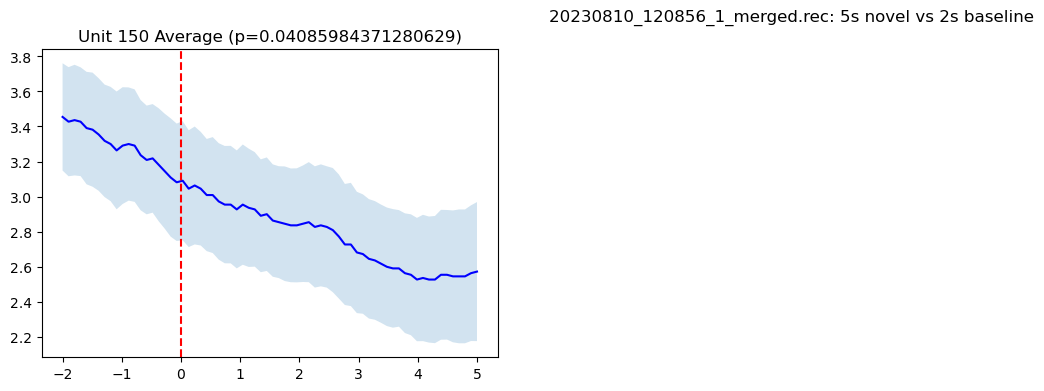

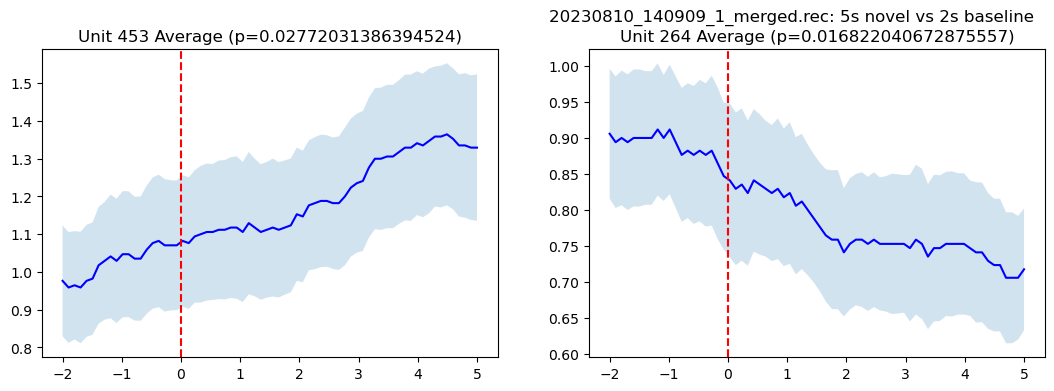

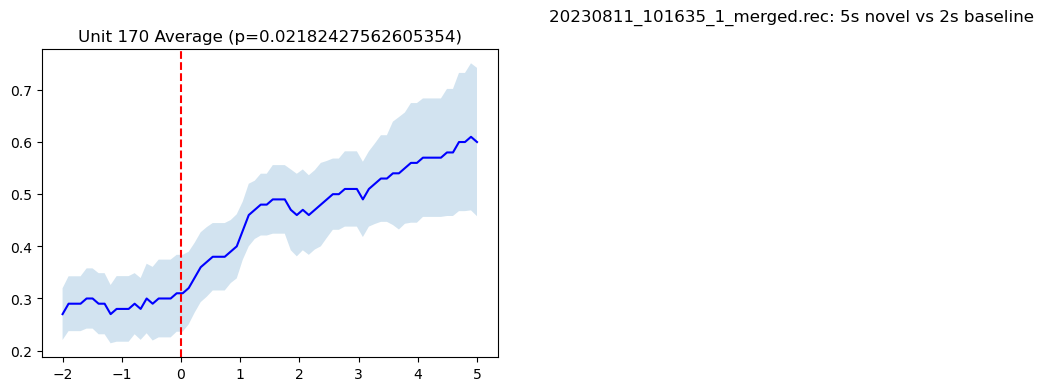

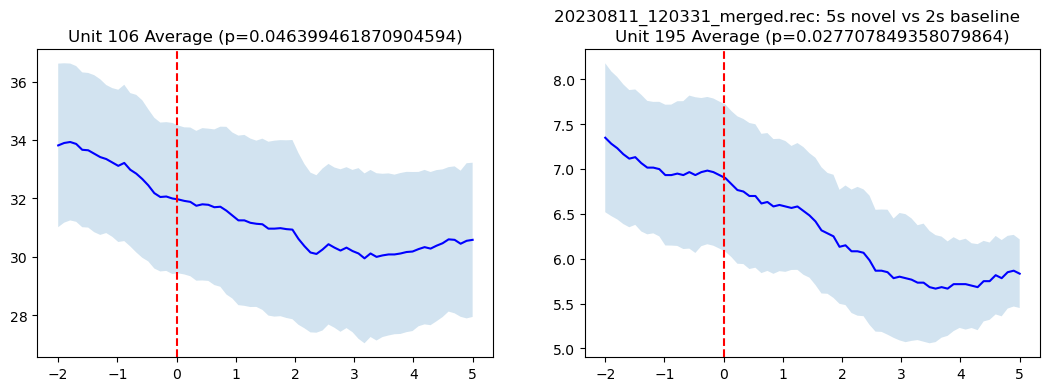

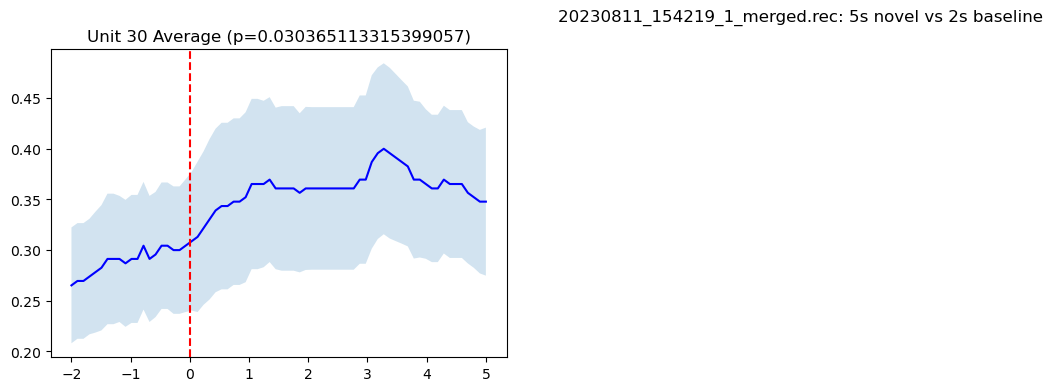

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

<Figure size 2000x0 with 0 Axes>

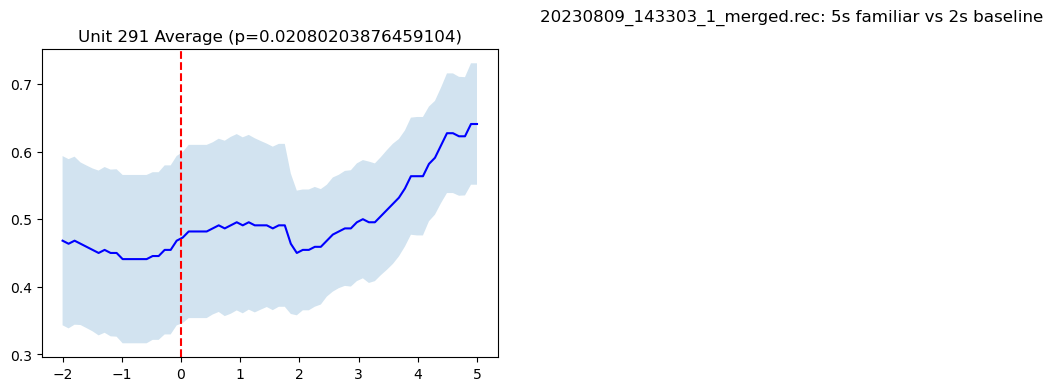

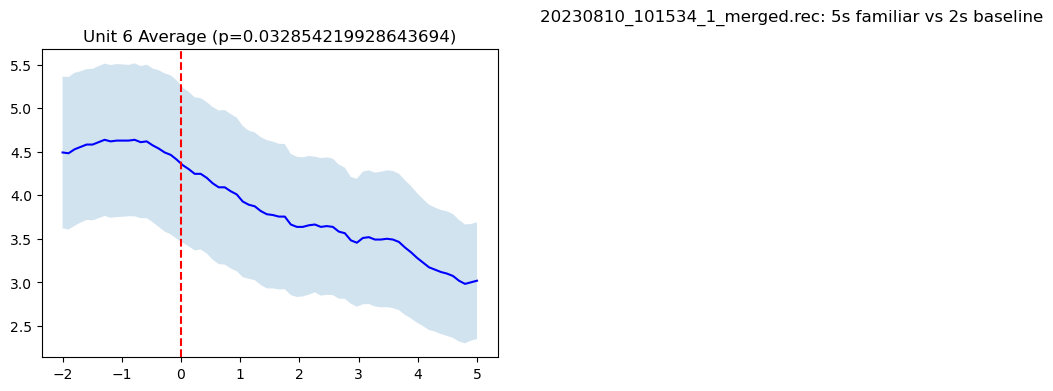

<Figure size 2000x0 with 0 Axes>

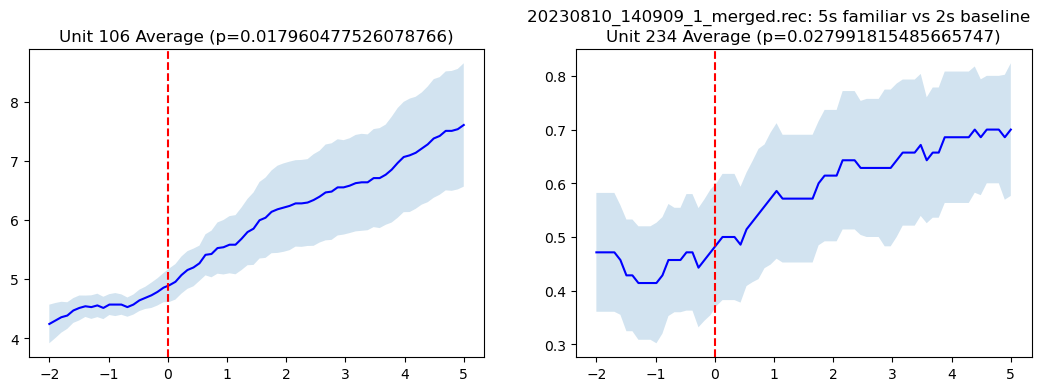

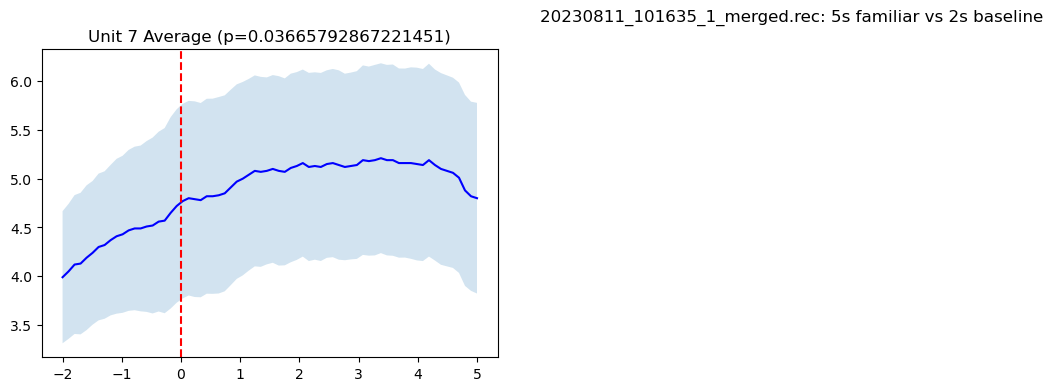

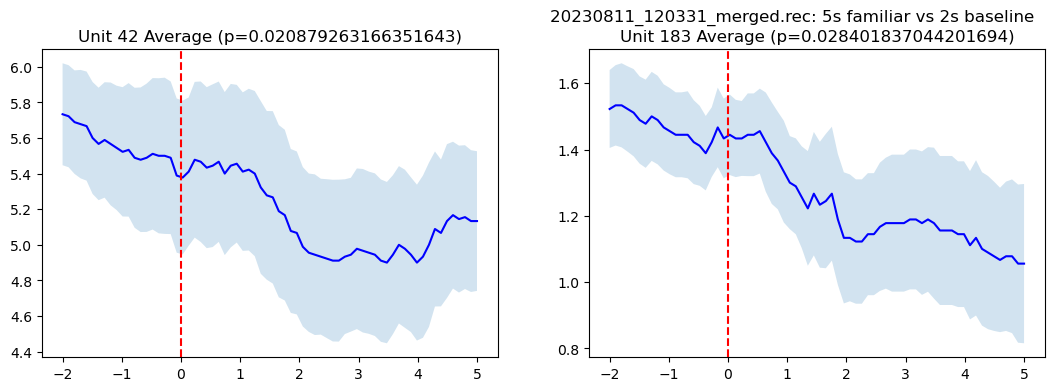

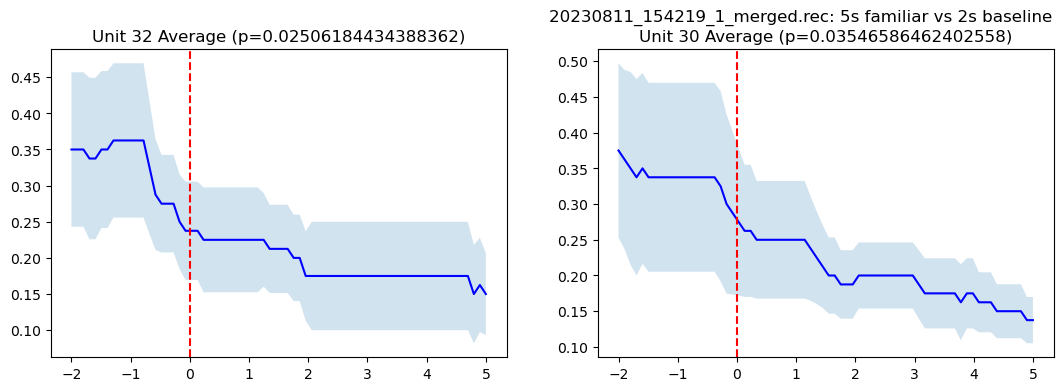

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


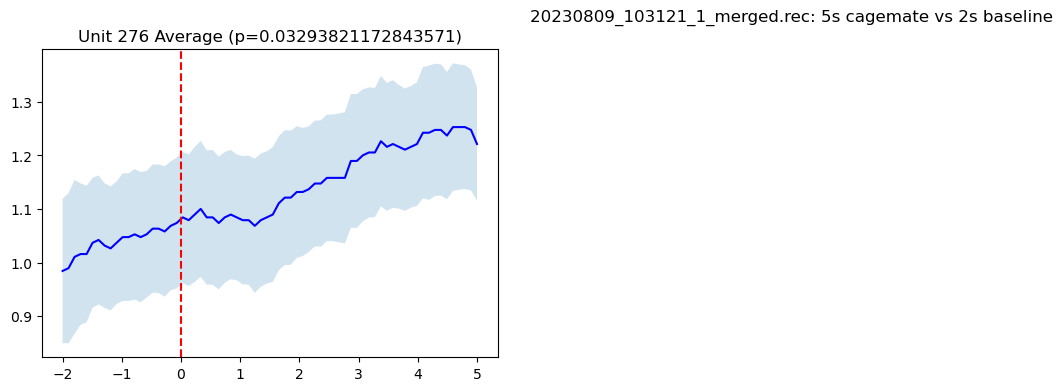

<Figure size 2000x0 with 0 Axes>

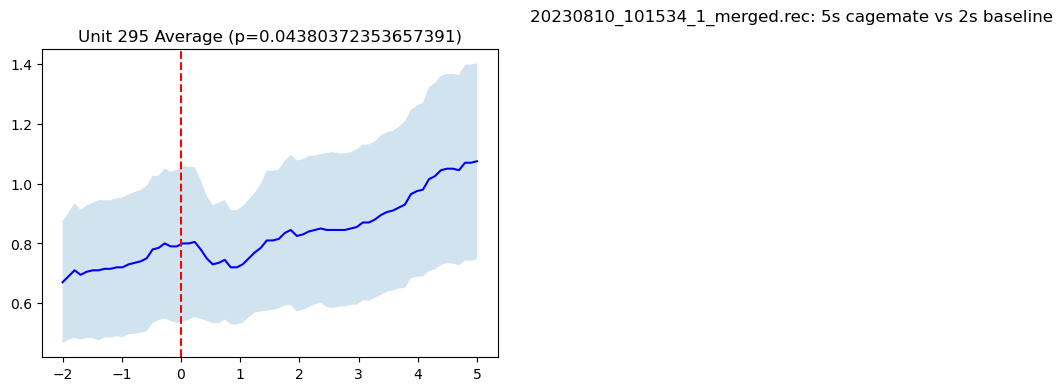

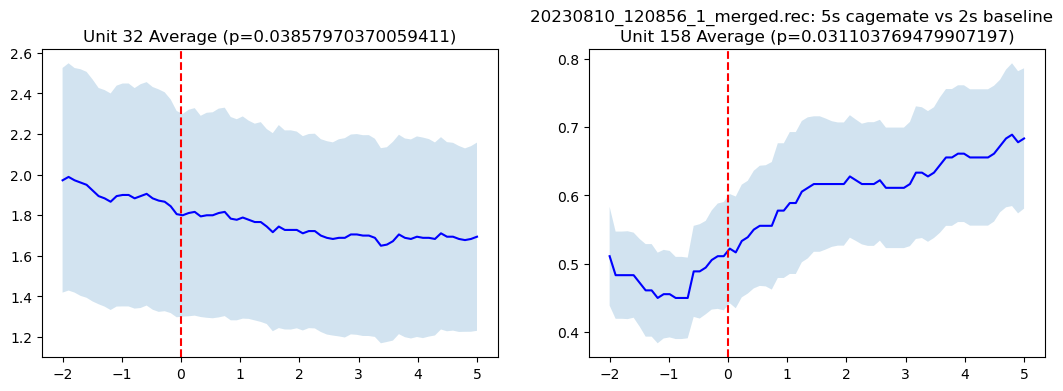

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

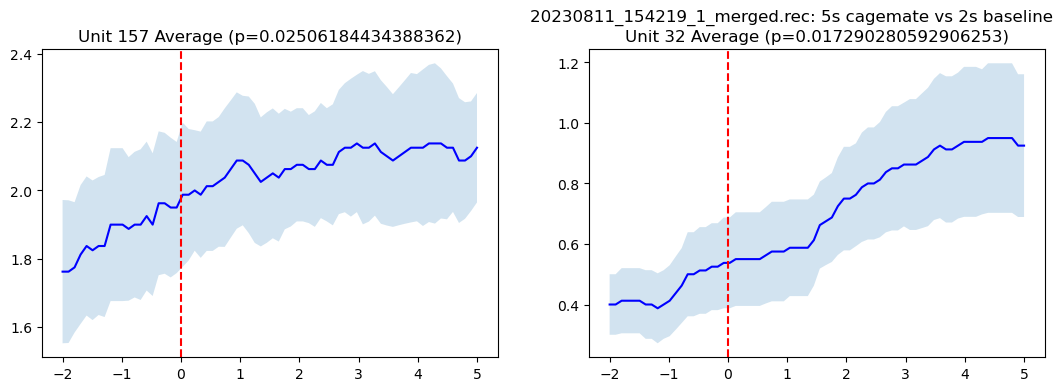

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

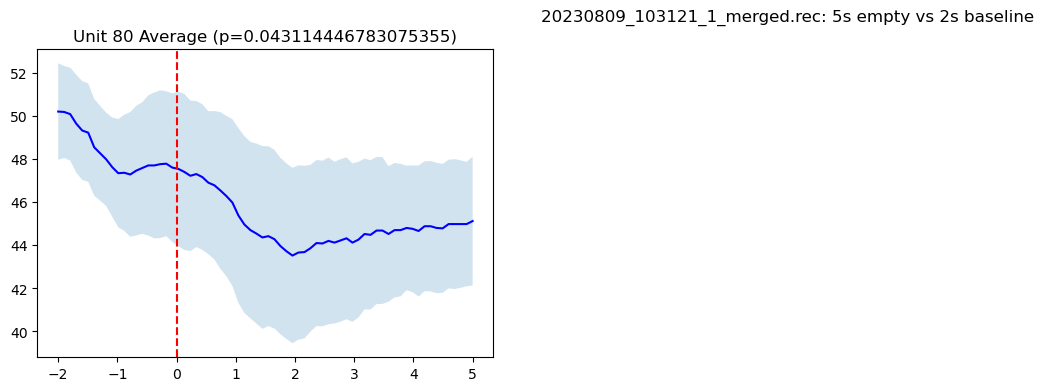

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

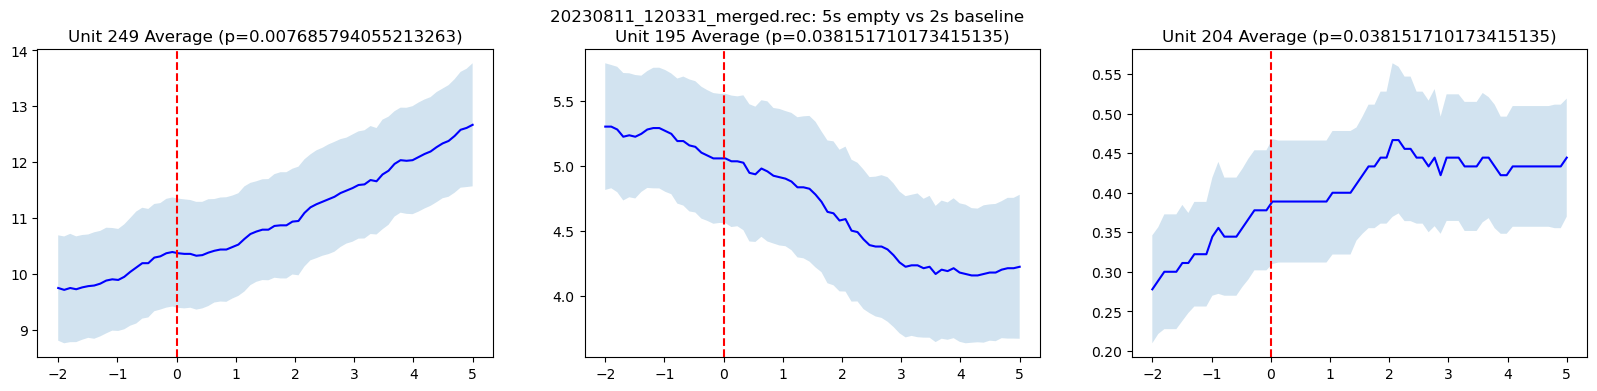

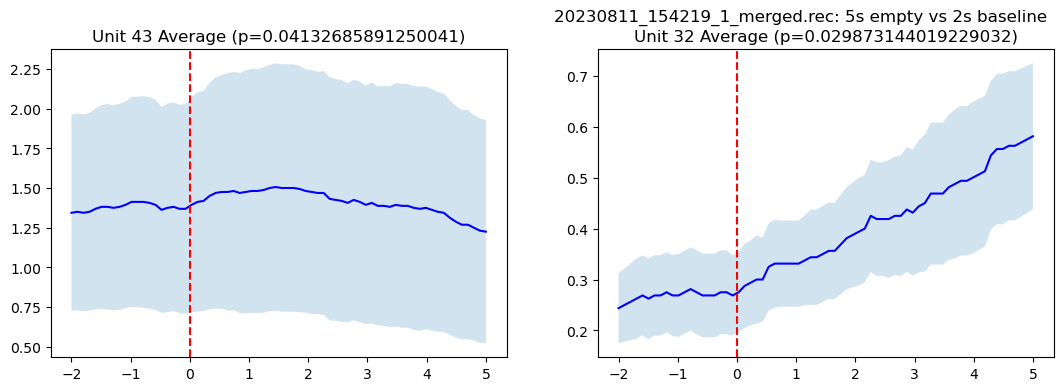

In [19]:
for event in ['novel', 'familiar', 'cagemate', 'empty']:
    phase3_analysis.wilcox_baseline_v_event_collection(event, 2, 5, save = True)

In [20]:
phase3_analysis.fishers_exact_wilcox('novel', 'empty', 5, 2)

(2.2564102564102564, 0.15582726771936872, [[13, 169], [6, 176]])

In [21]:
phase3_analysis.fishers_exact_wilcox('familiar', 'empty', 5, 2)

(1.5260115606936415, 0.5994715679677198, [[9, 173], [6, 176]])

In [22]:
phase3_analysis.fishers_exact_wilcox('familiar', 'novel', 2, 2)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.7558139534883721, 0.6674474417957368, [[10, 172], [13, 169]])

In [23]:
phase3_analysis.fishers_exact_wilcox('cagemate', 'novel', 2, 2)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.29213483146067415, 0.043907358543186926, [[4, 178], [13, 169]])

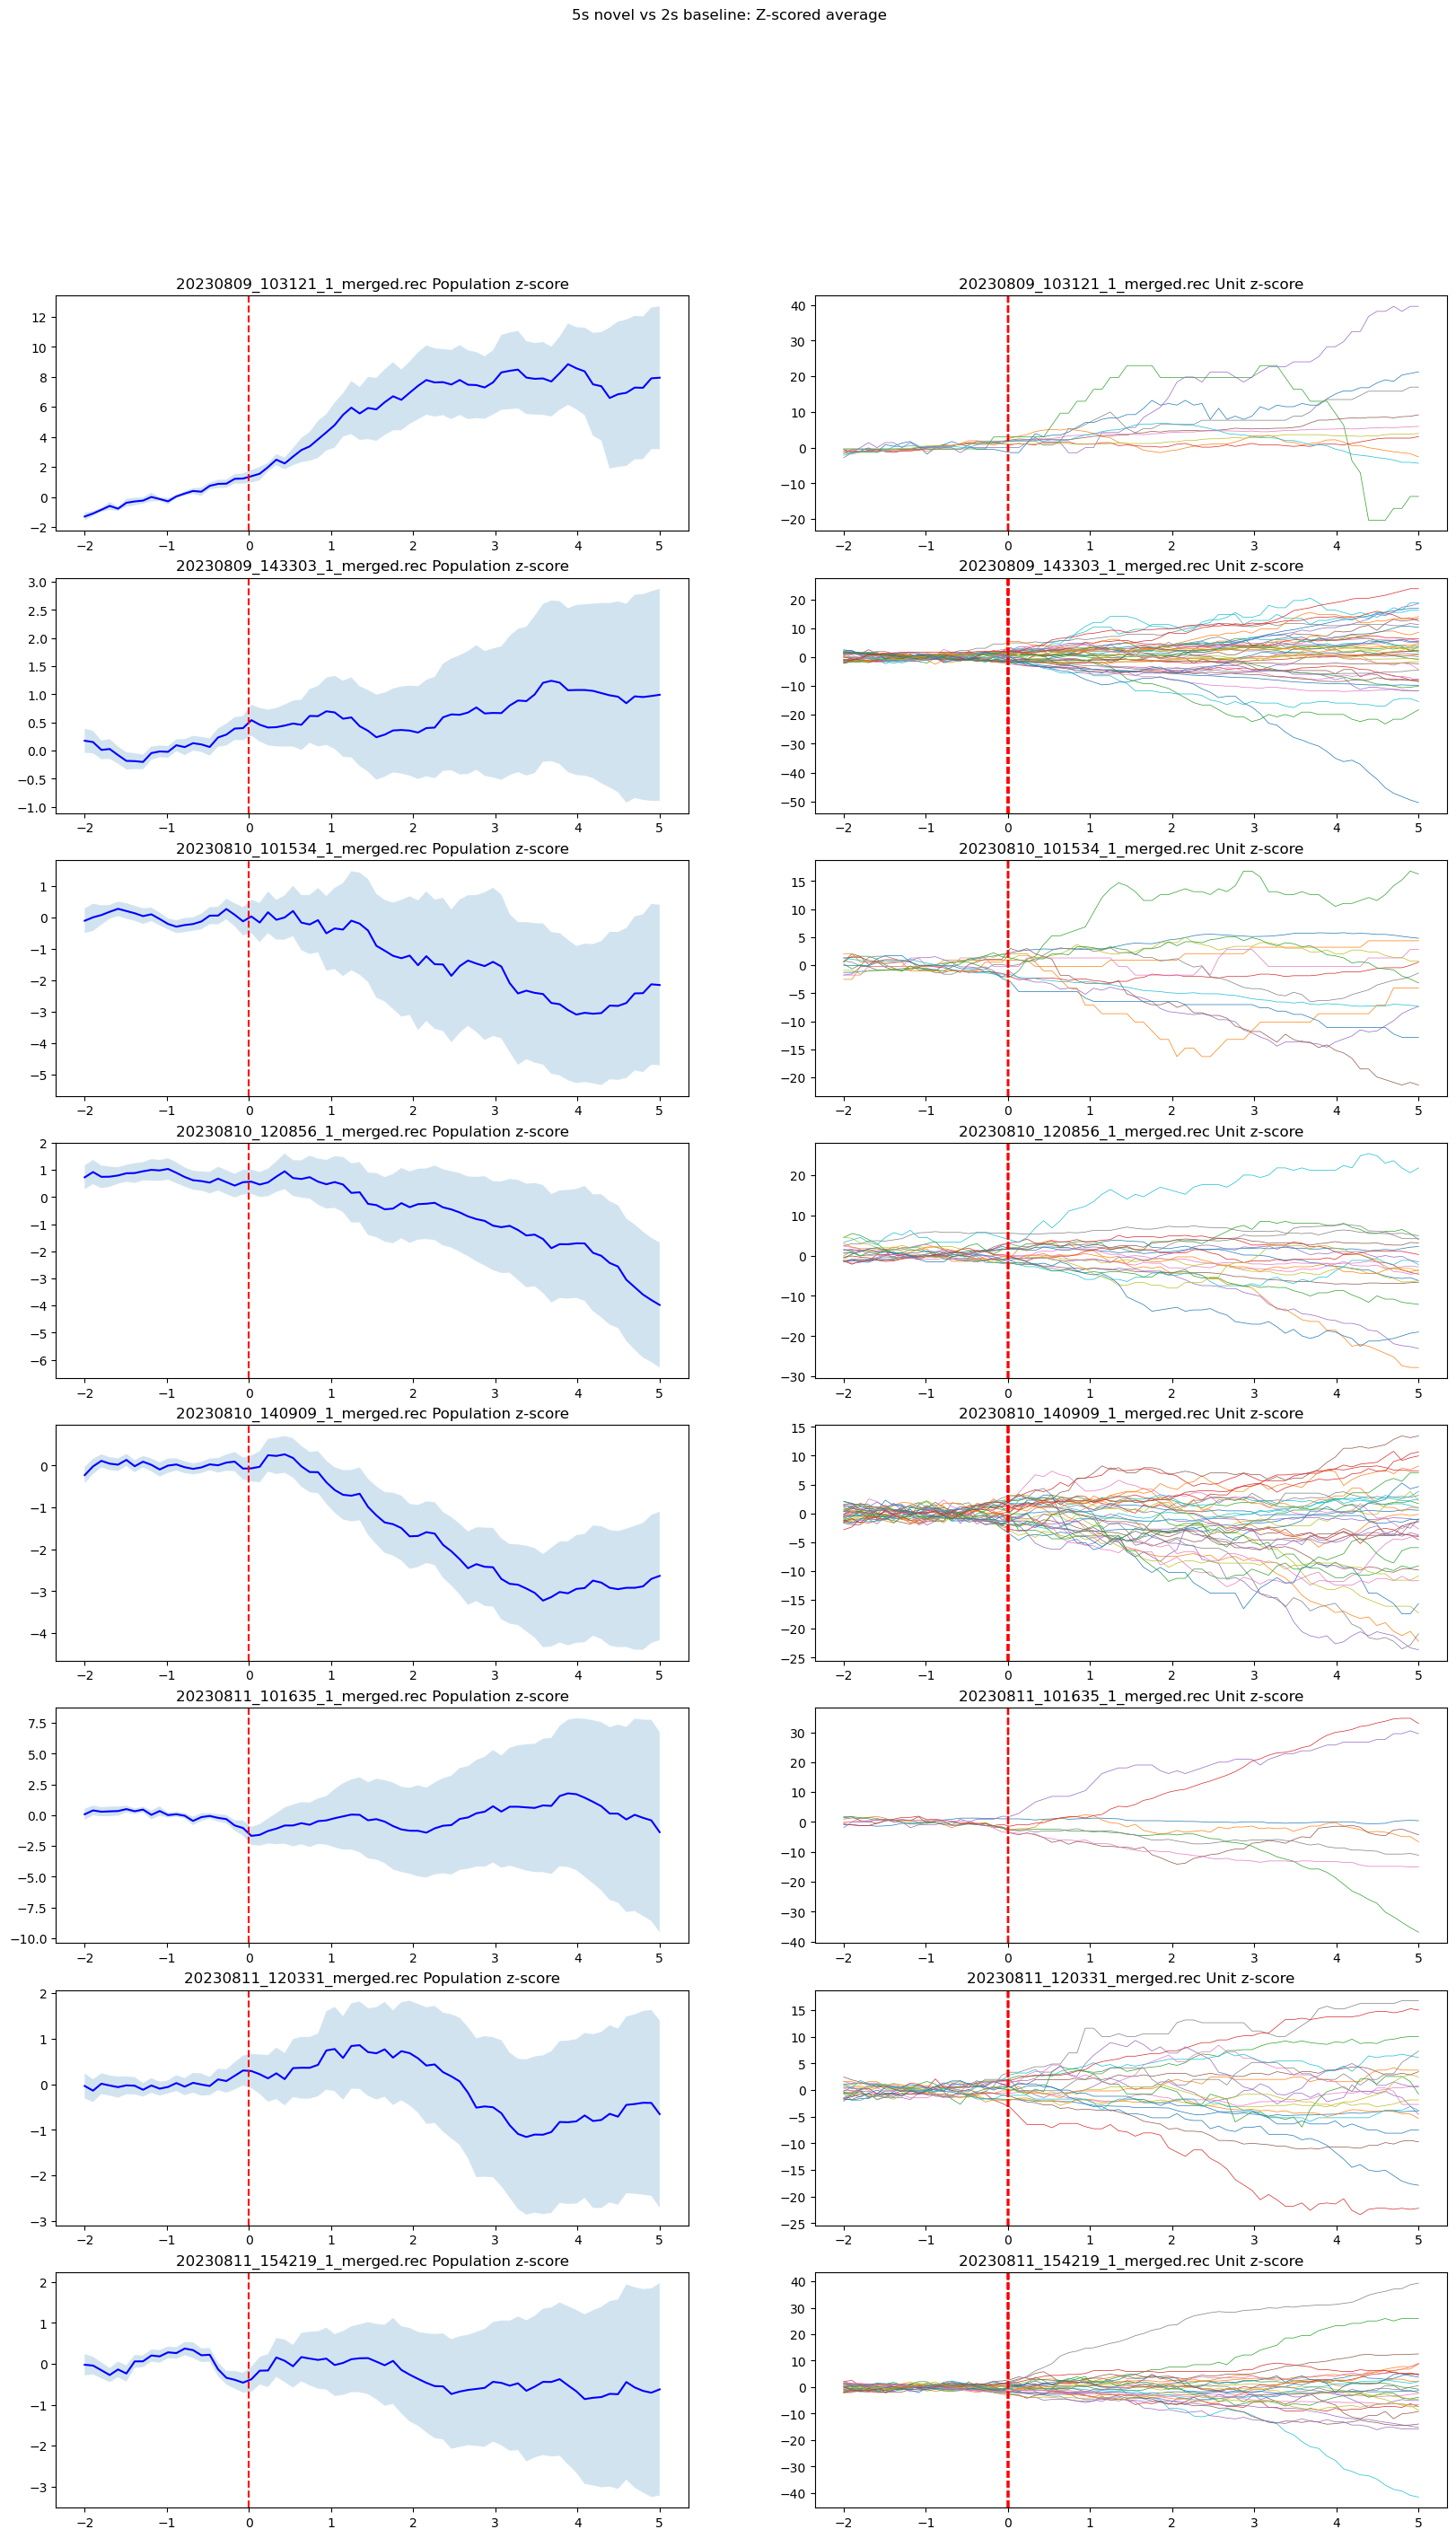

In [24]:
phase3_analysis.zscore_collection('novel', 2, 5)

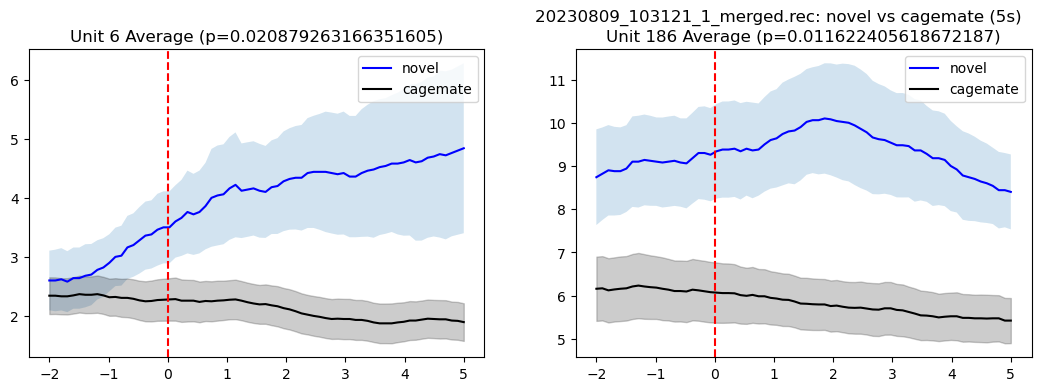

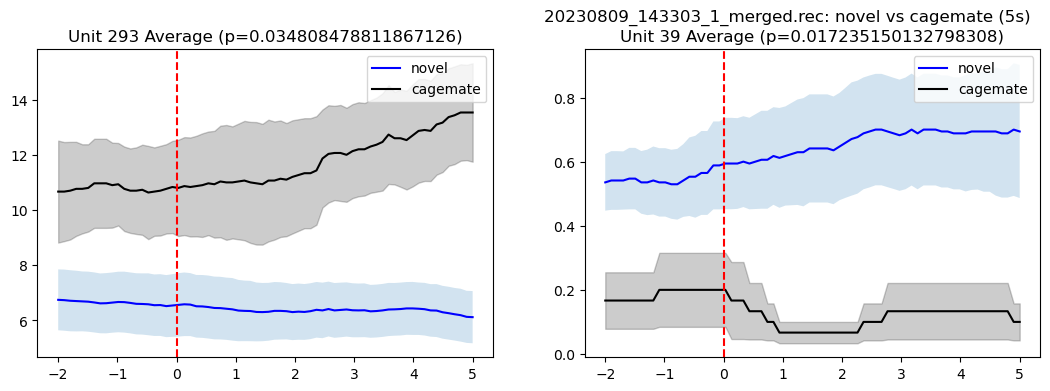

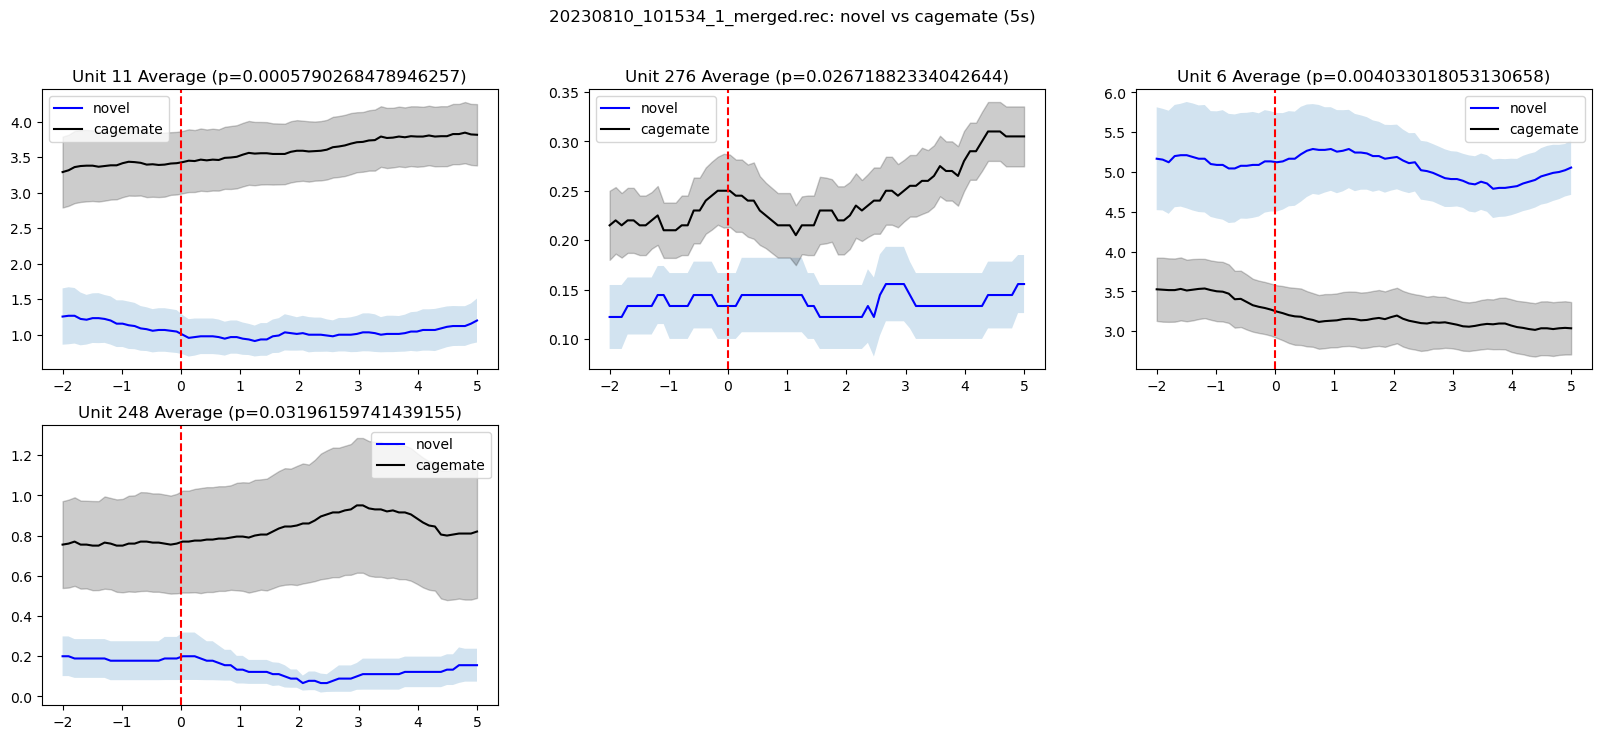

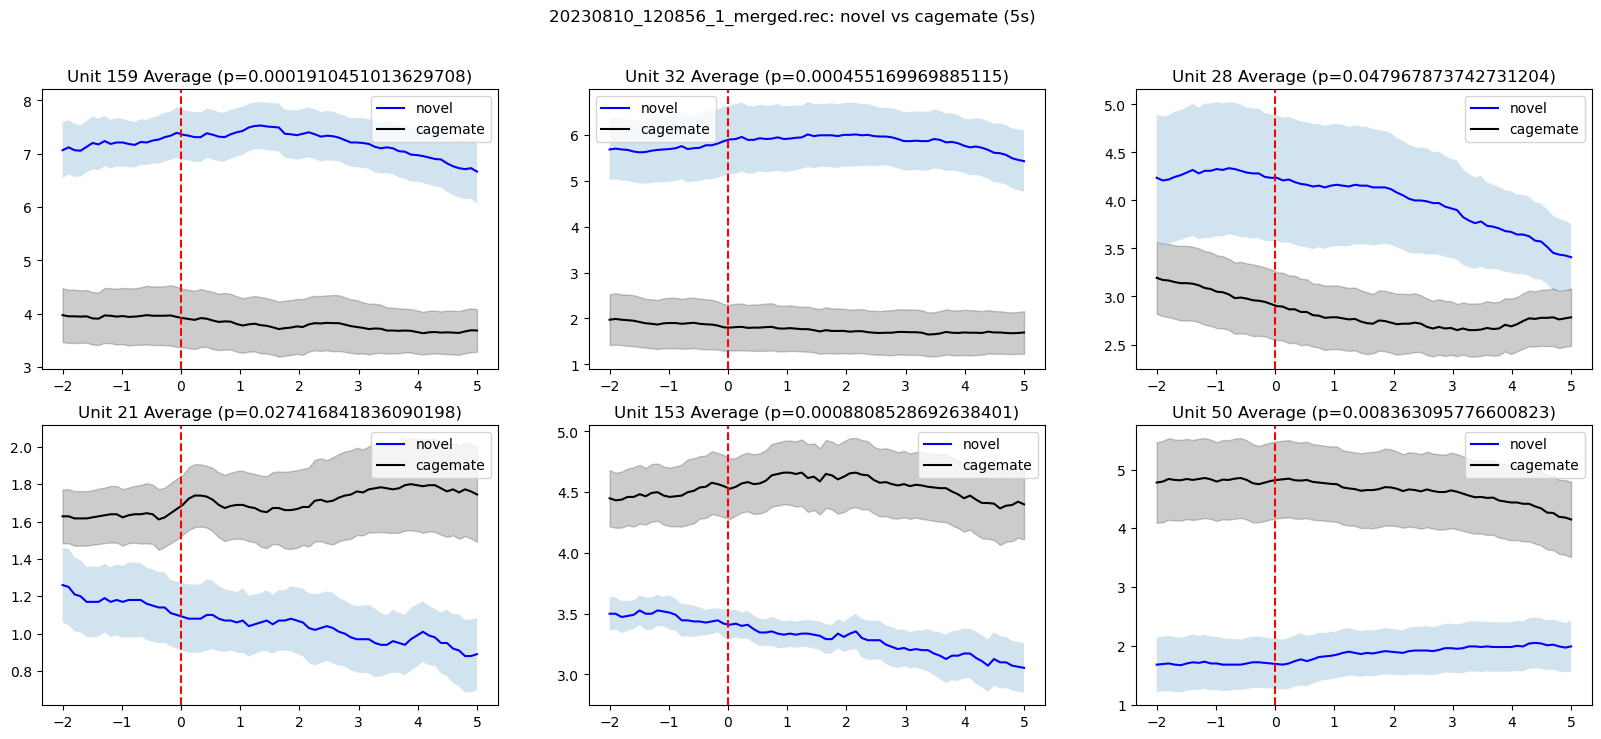

<Figure size 2000x0 with 0 Axes>

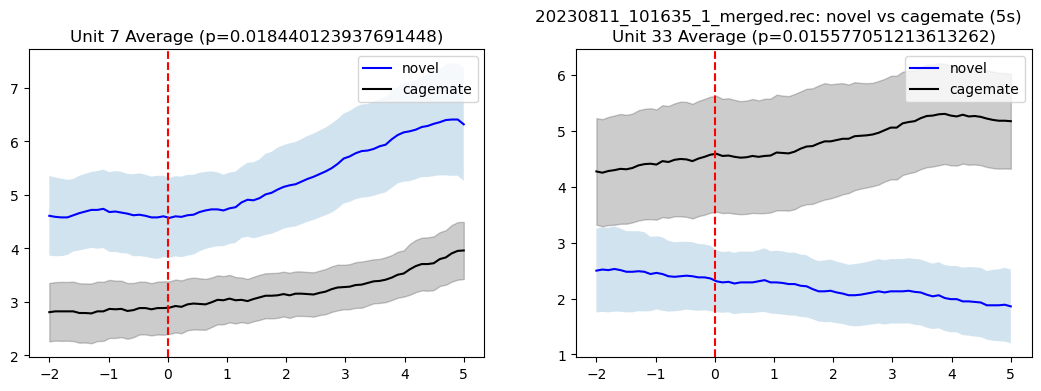

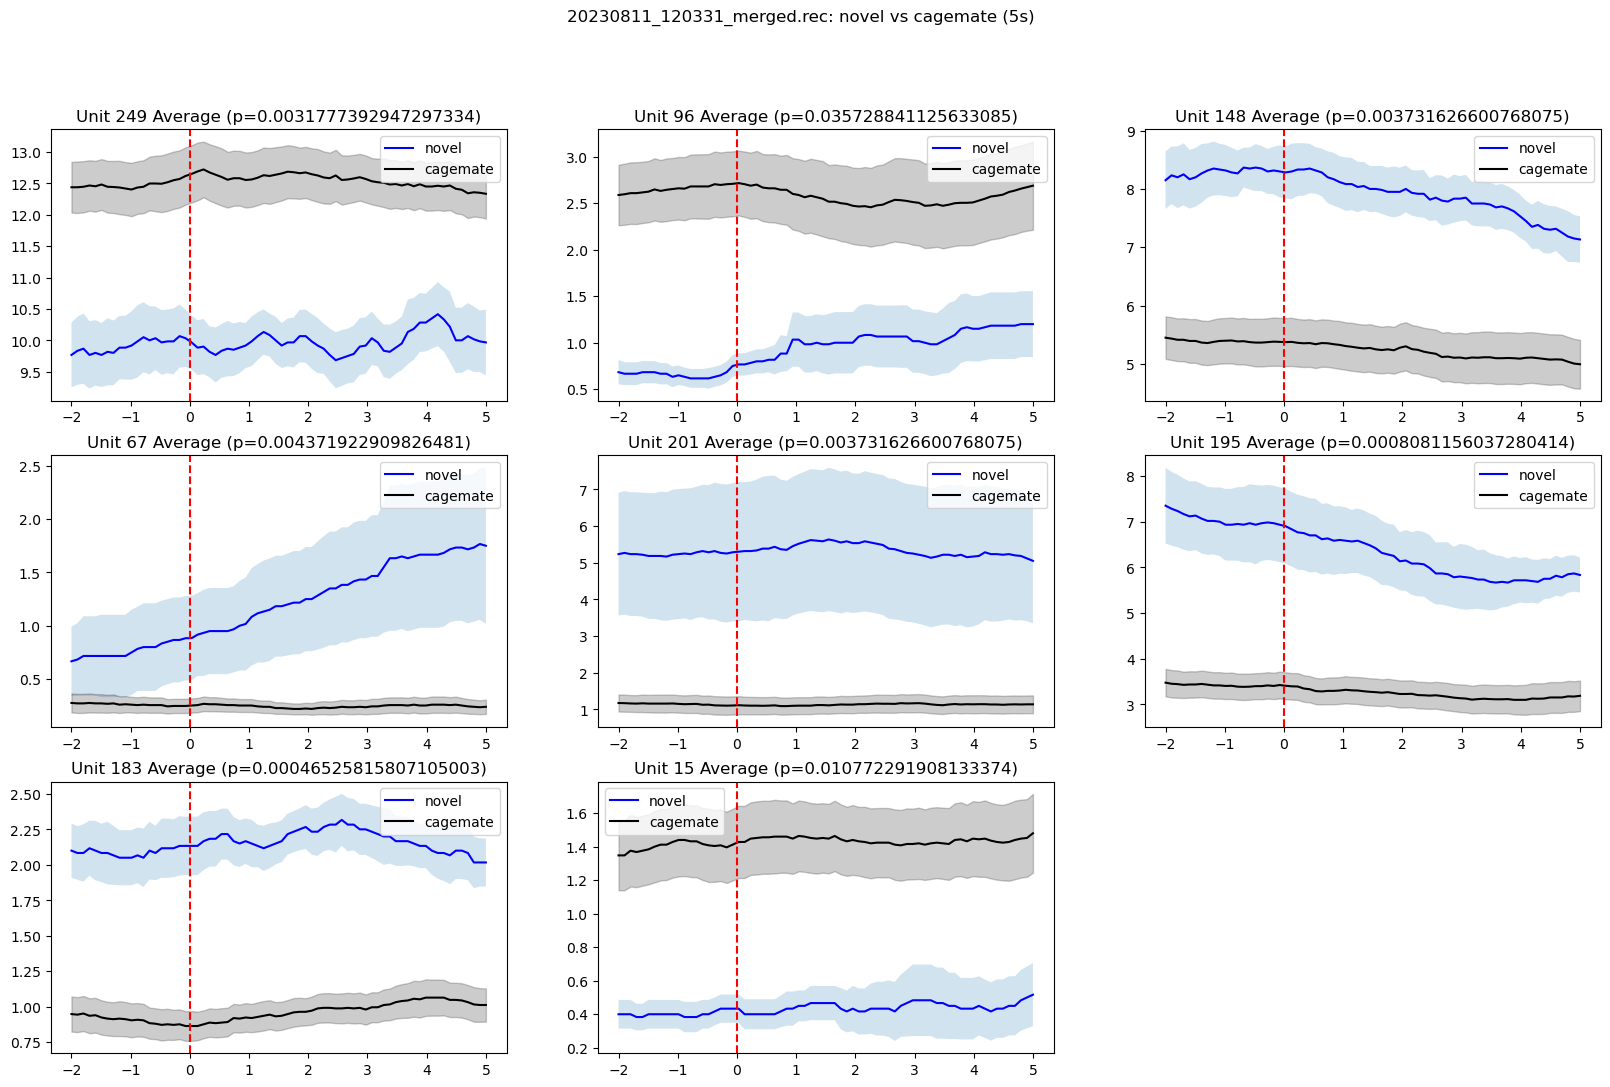

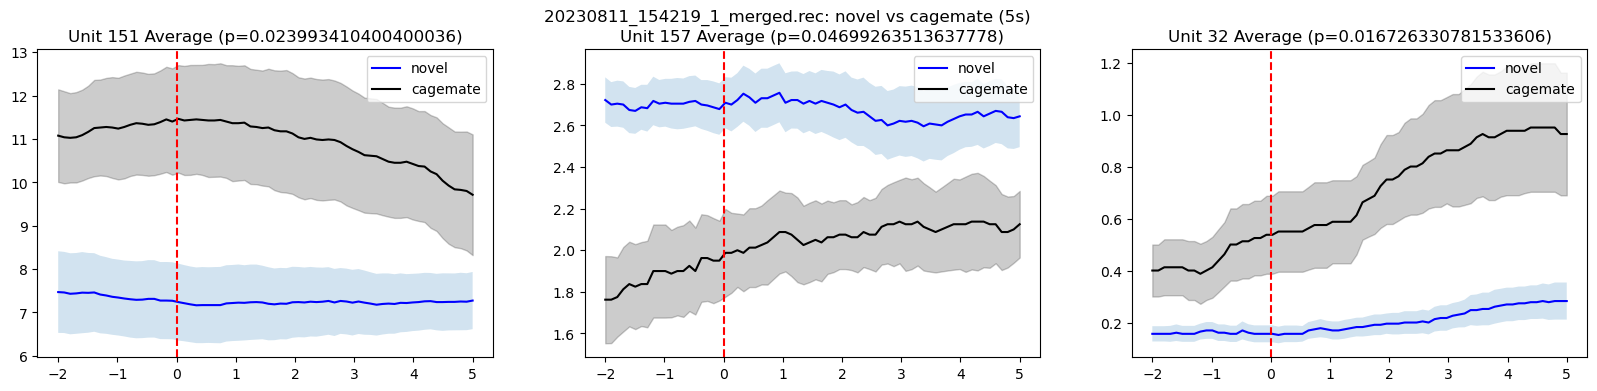

In [25]:
phase3_analysis.wilcox_event_v_event_collection('novel', 'cagemate', 5, 2, save = True)

<Figure size 2000x0 with 0 Axes>

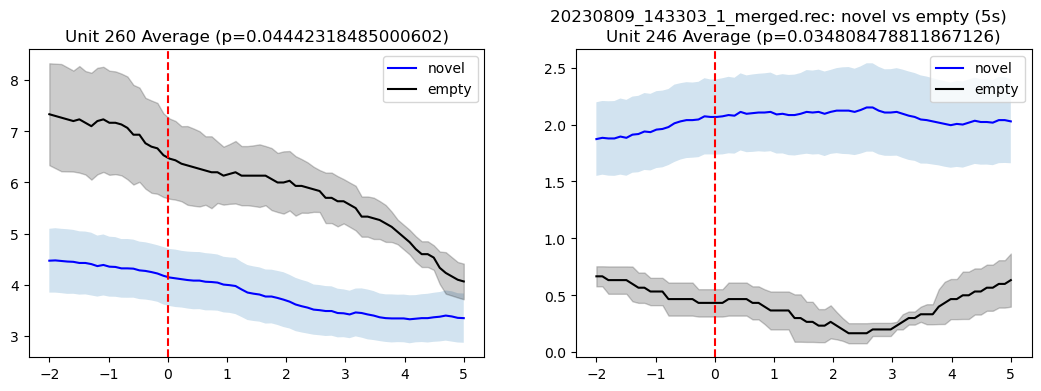

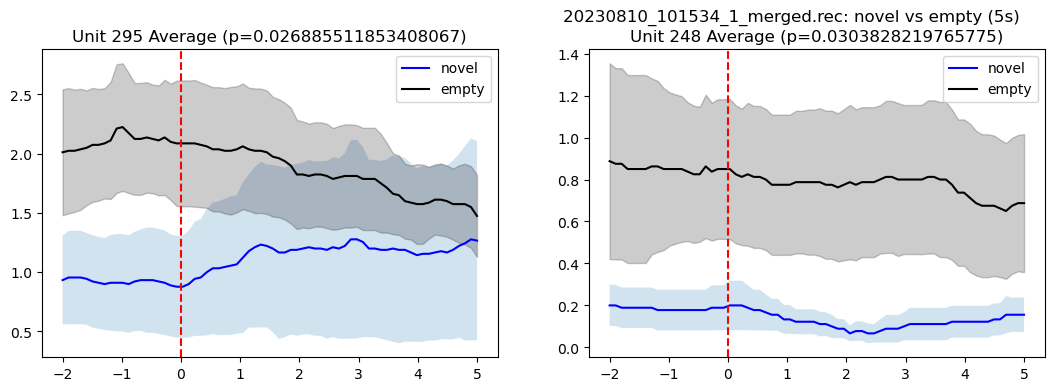

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

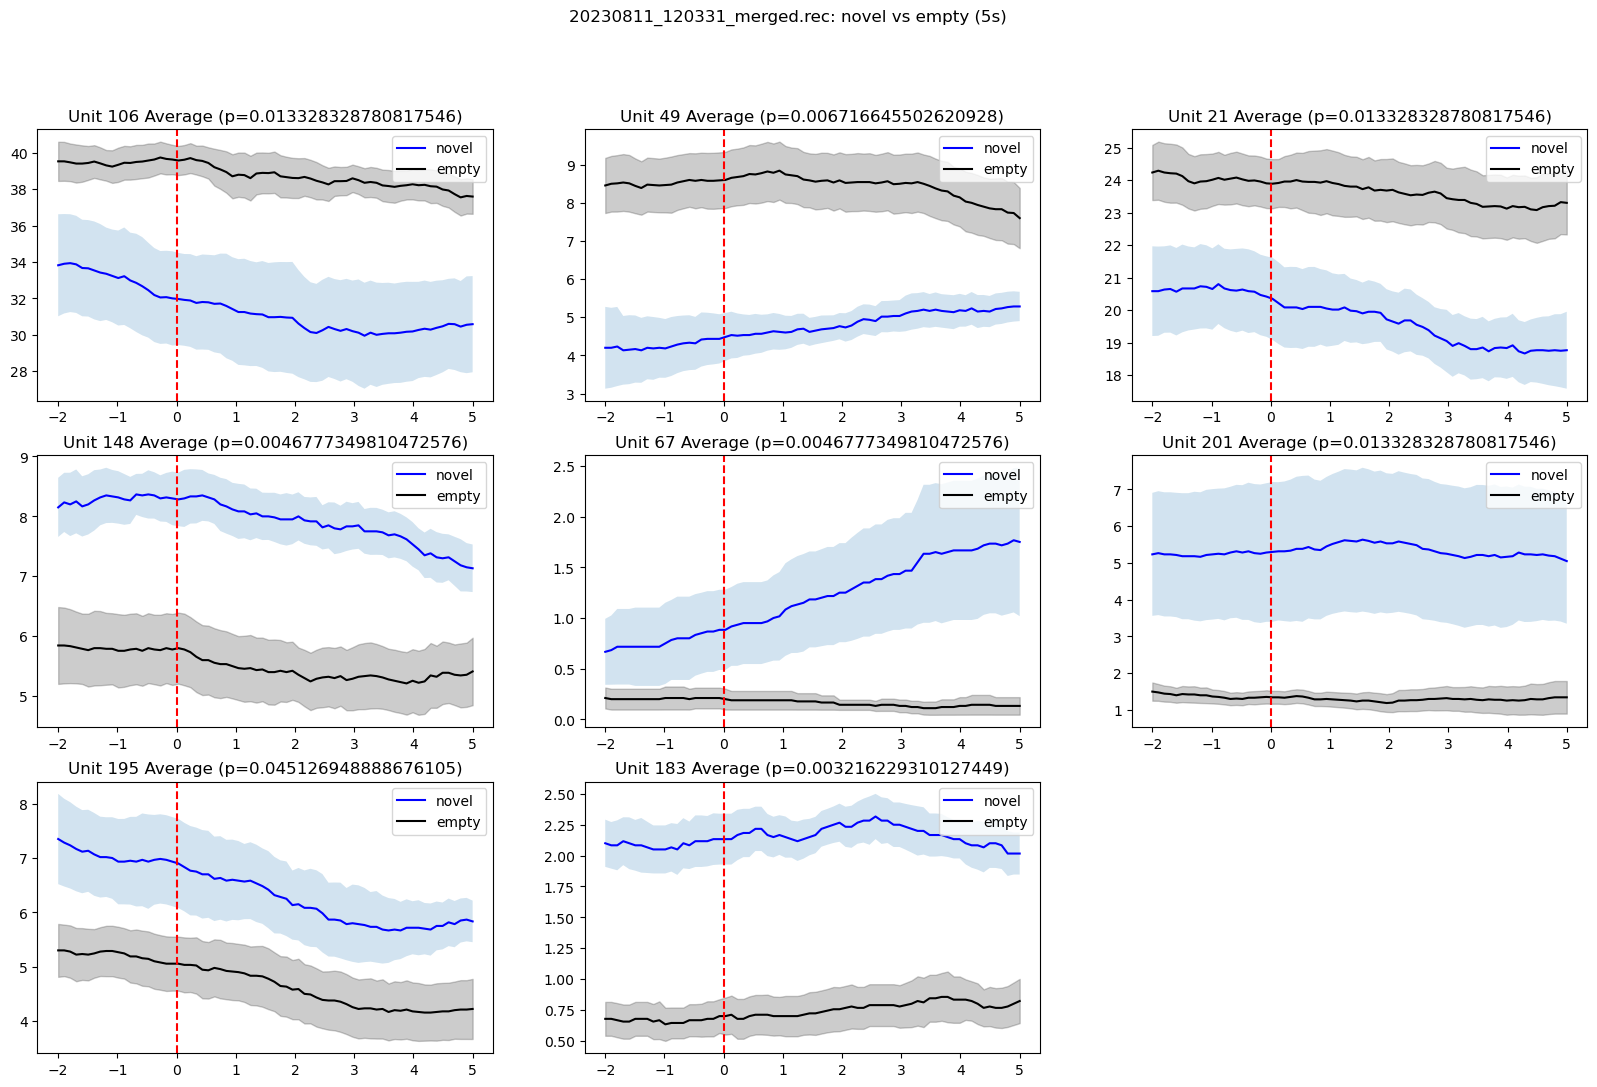

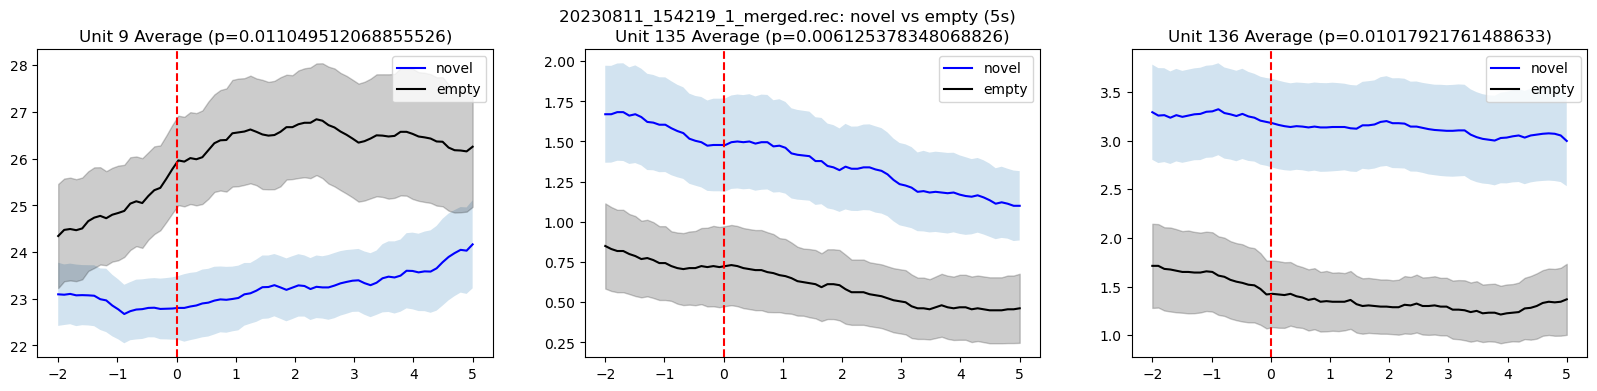

In [26]:
phase3_analysis.wilcox_event_v_event_collection('novel', 'empty', 5, 2, save = True)
phase3_analysis.wilcox_event_v_event_collection('cagemate', 'empty', 5, 2, plot = False, save = True)
phase3_analysis.wilcox_event_v_event_collection('familiar', 'empty', 5, 2, plot = False, save = True)
phase3_analysis.wilcox_event_v_event_collection('novel', 'familiar', 5, 2, plot = False, save = True)
phase3_analysis.wilcox_event_v_event_collection('cagemate', 'familiar', 5, 2, plot = False, save = True)

<Figure size 2000x0 with 0 Axes>

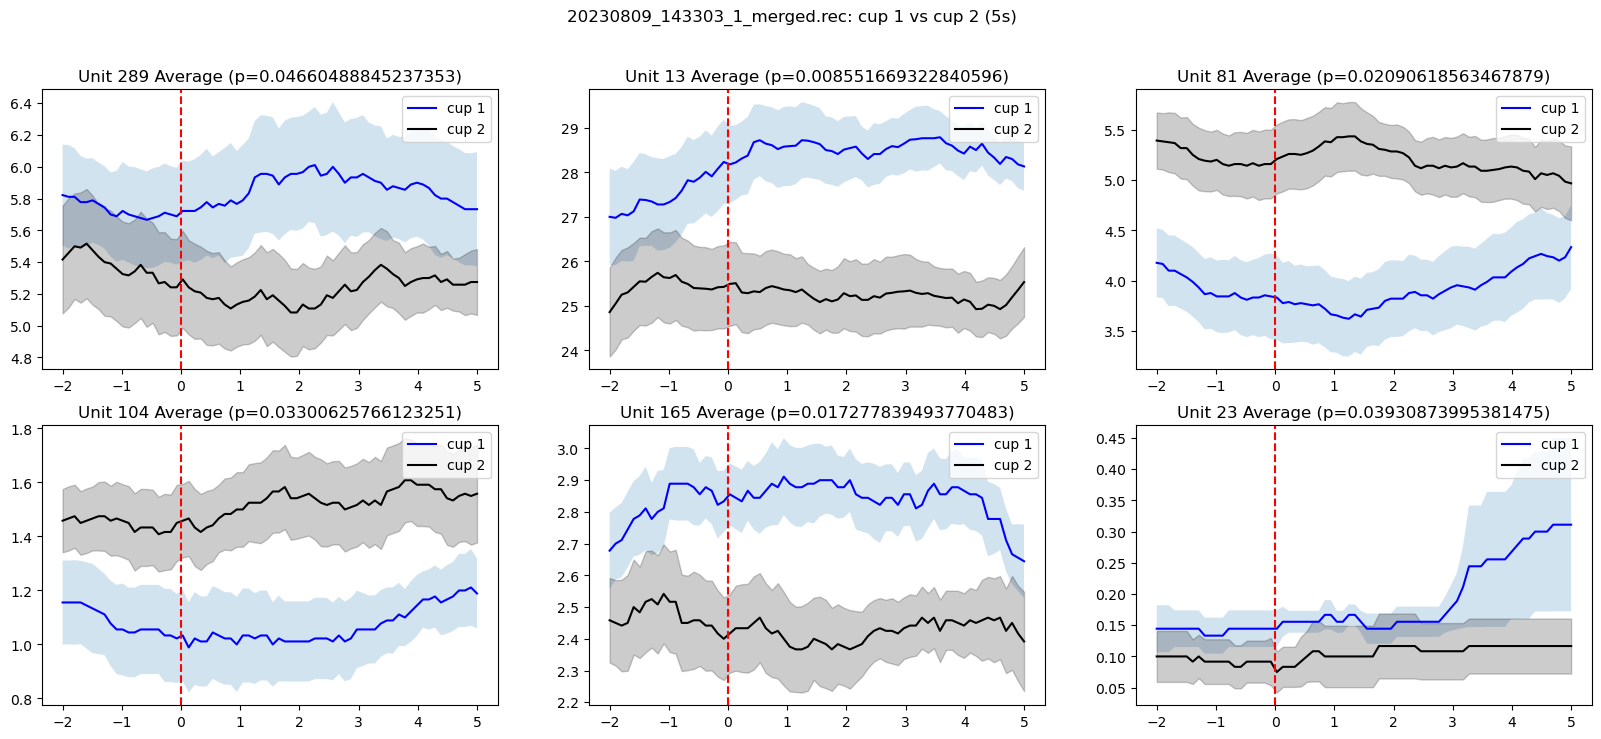

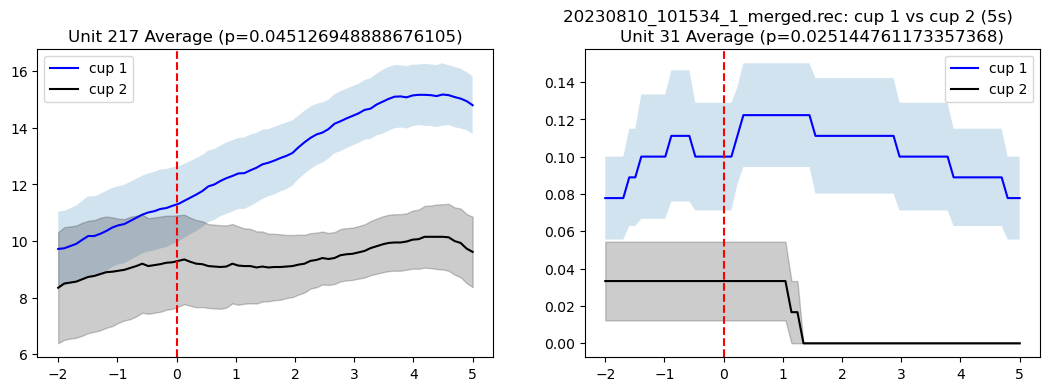

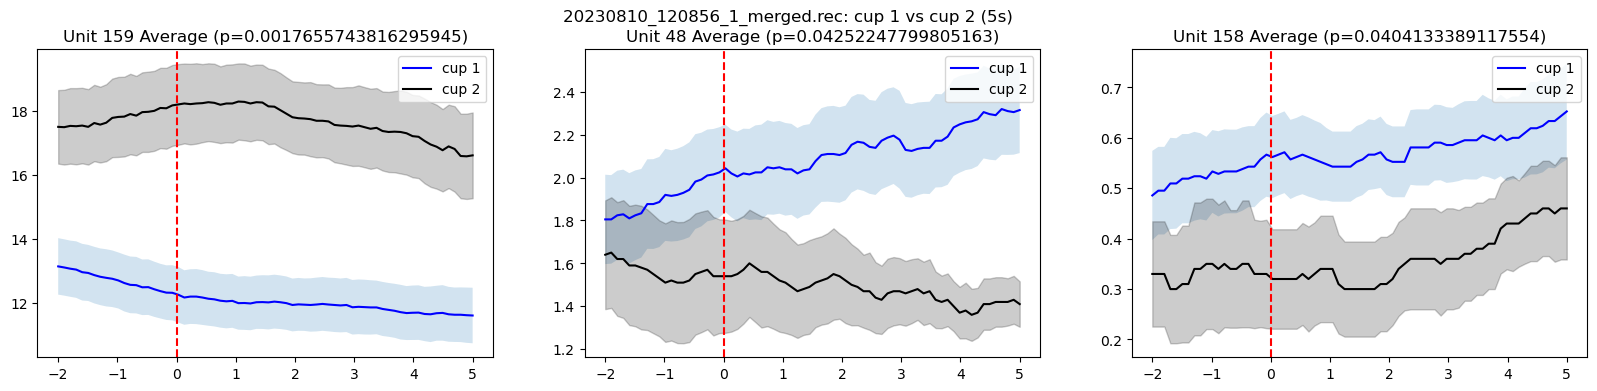

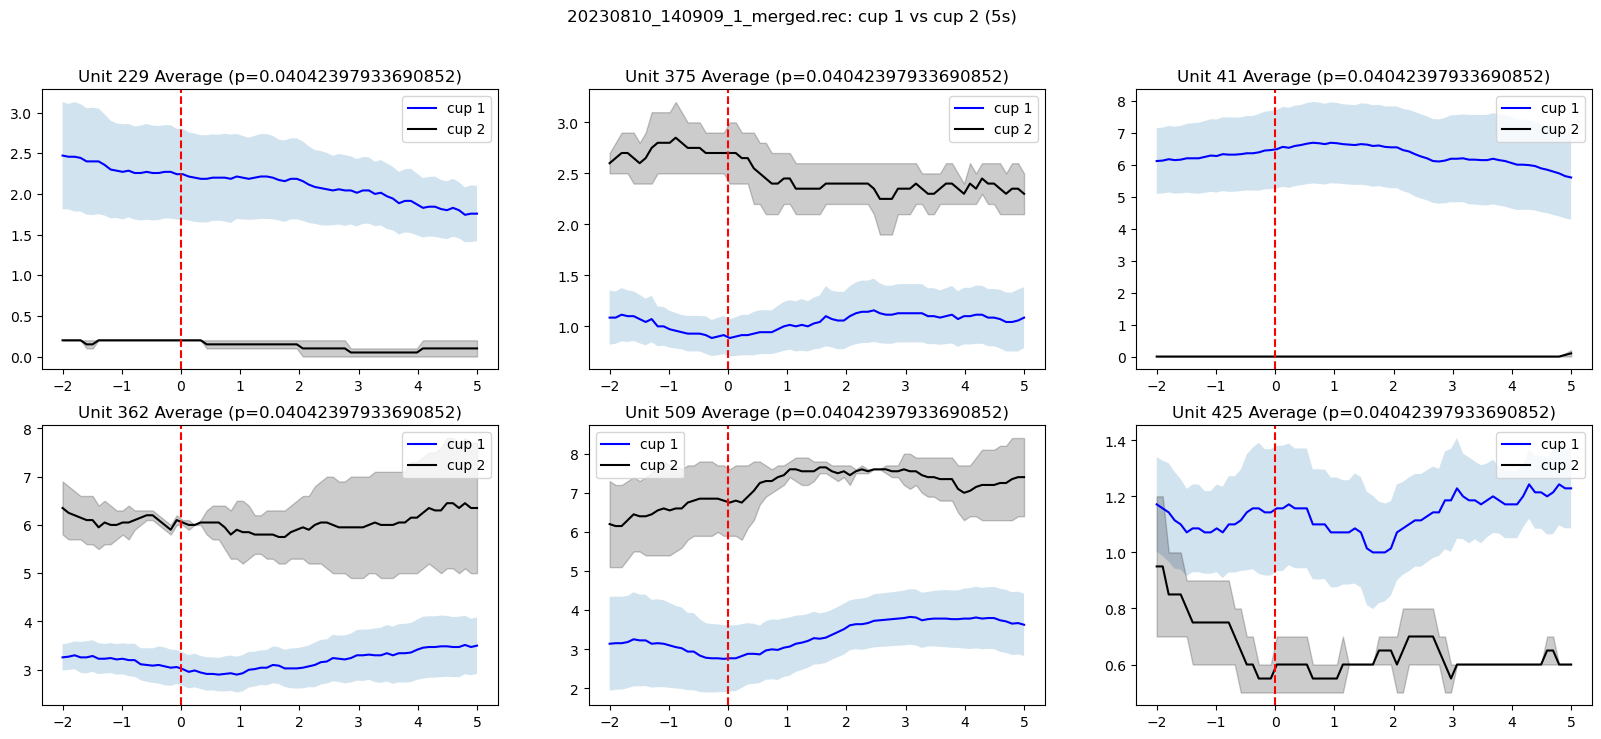

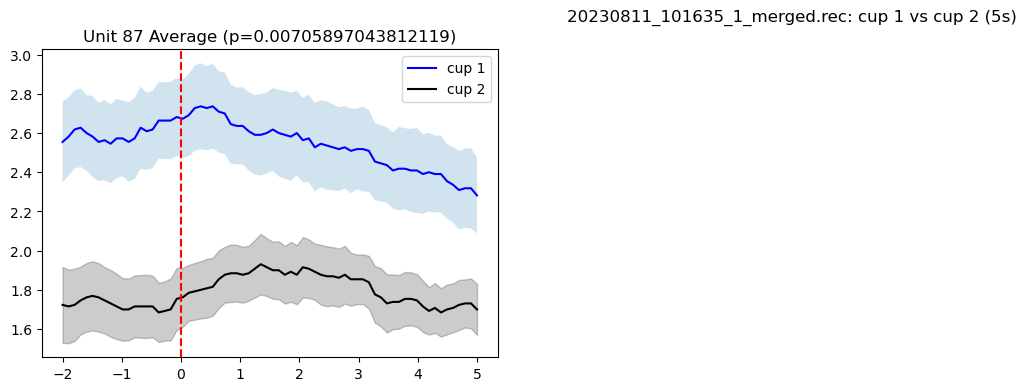

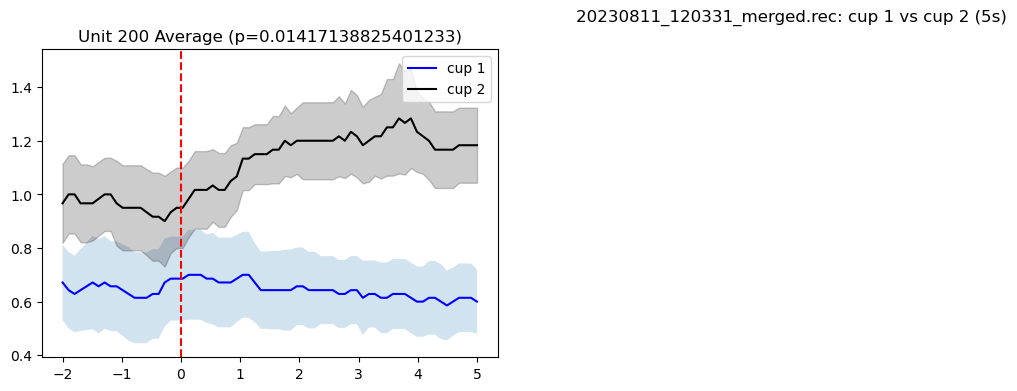

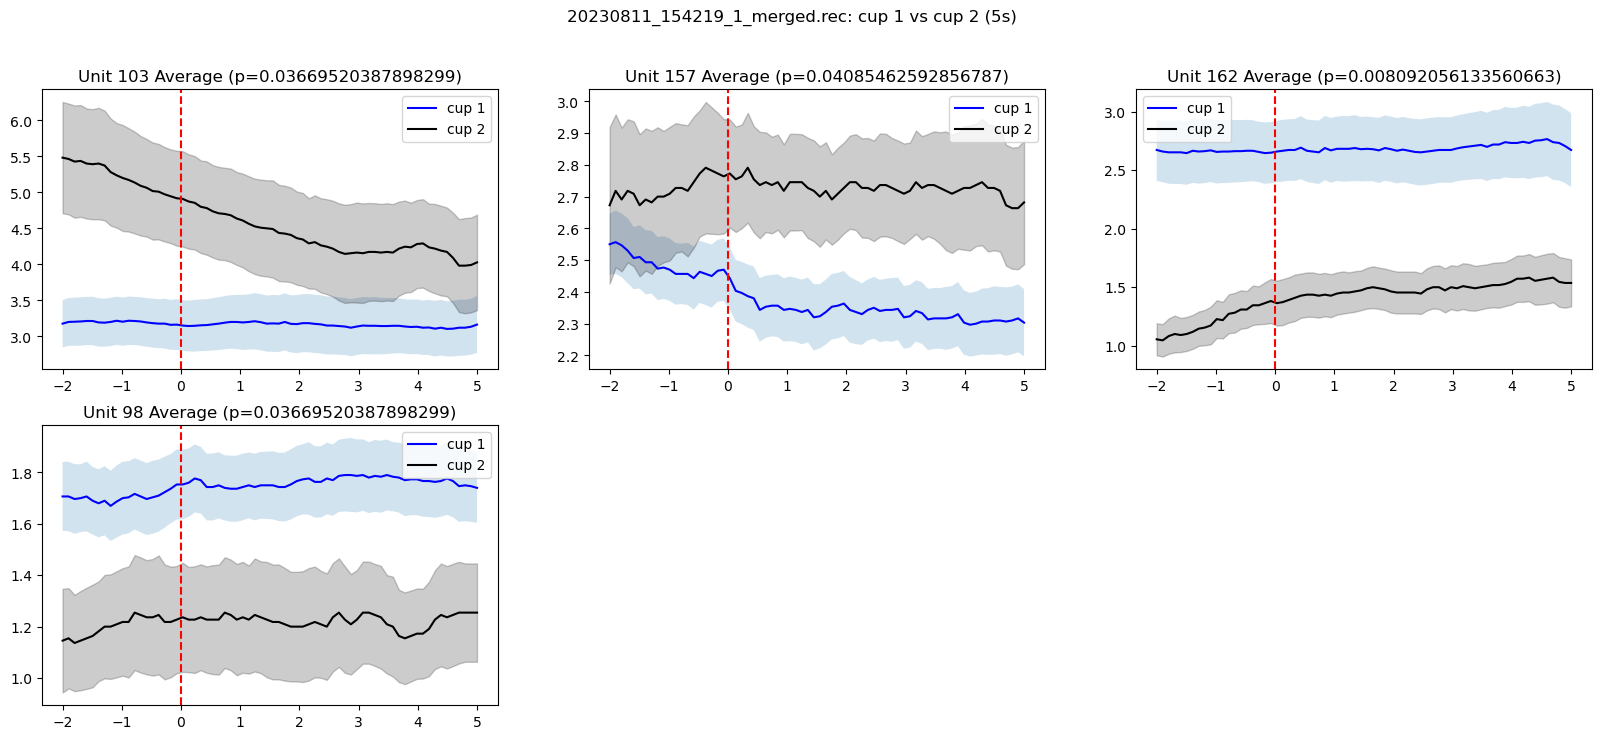

In [27]:
phase3_analysis.wilcox_event_v_event_collection('cup 1', 'cup 2', 5 ,2)

In [28]:
phase3_analysis.export()

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


No z-scored events saved.


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = master_df.merge(temp_df,
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = master_df.merge(temp_df,
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  ma

No fishers exact tests saved


In [58]:
phase3_analysis_250sw = spike.SpikeAnalysis_MultiRecording(phase3_collection, 100, 50, 0.5)


All set to analyze


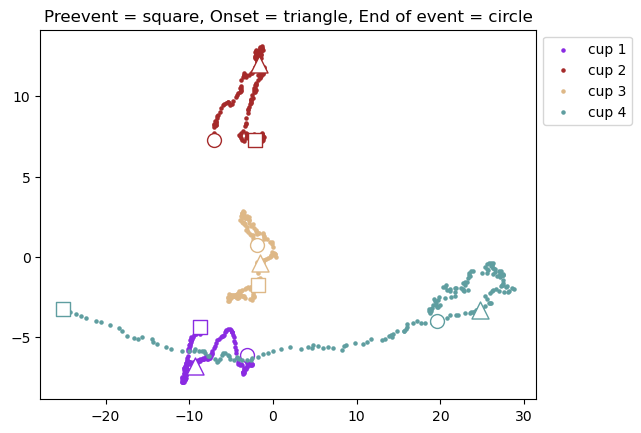

In [61]:
phase3_analysis_250sw.PCA_trajectories(5 ,5, events = ['cup 1', 'cup 2', 'cup 3', 'cup 4'])

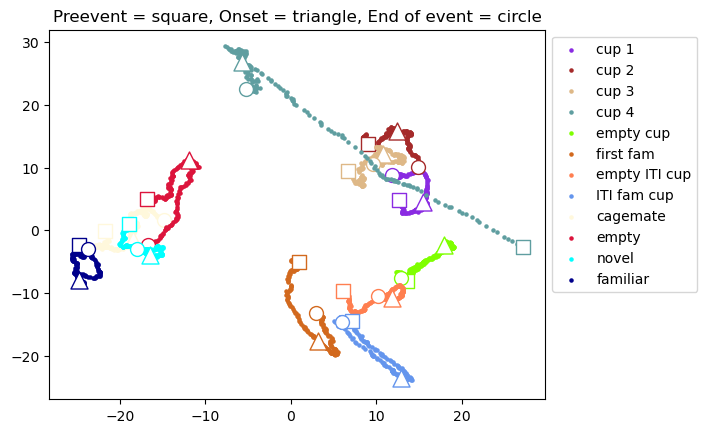

In [59]:
phase3_analysis_250sw.PCA_trajectories(5 ,5)

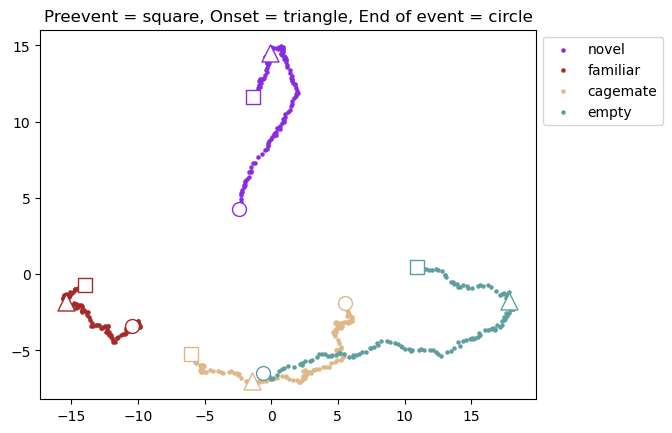

In [60]:
phase3_analysis_250sw.PCA_trajectories(5 ,2, events = ['novel', 'familiar', 'cagemate', 'empty'])

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

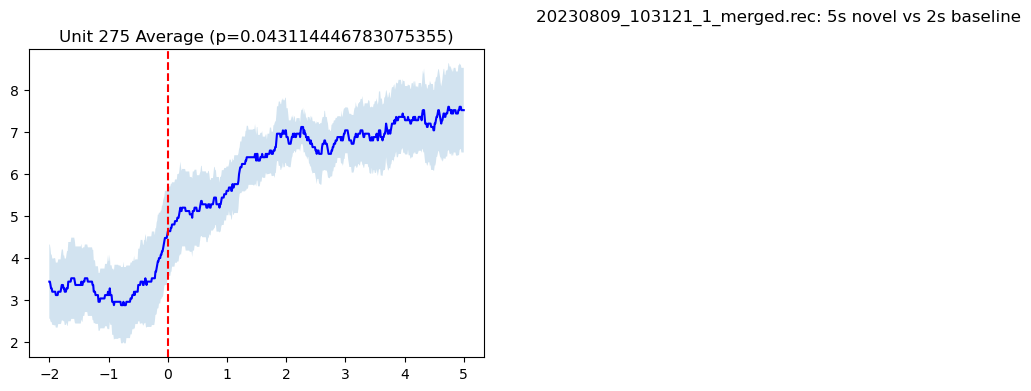

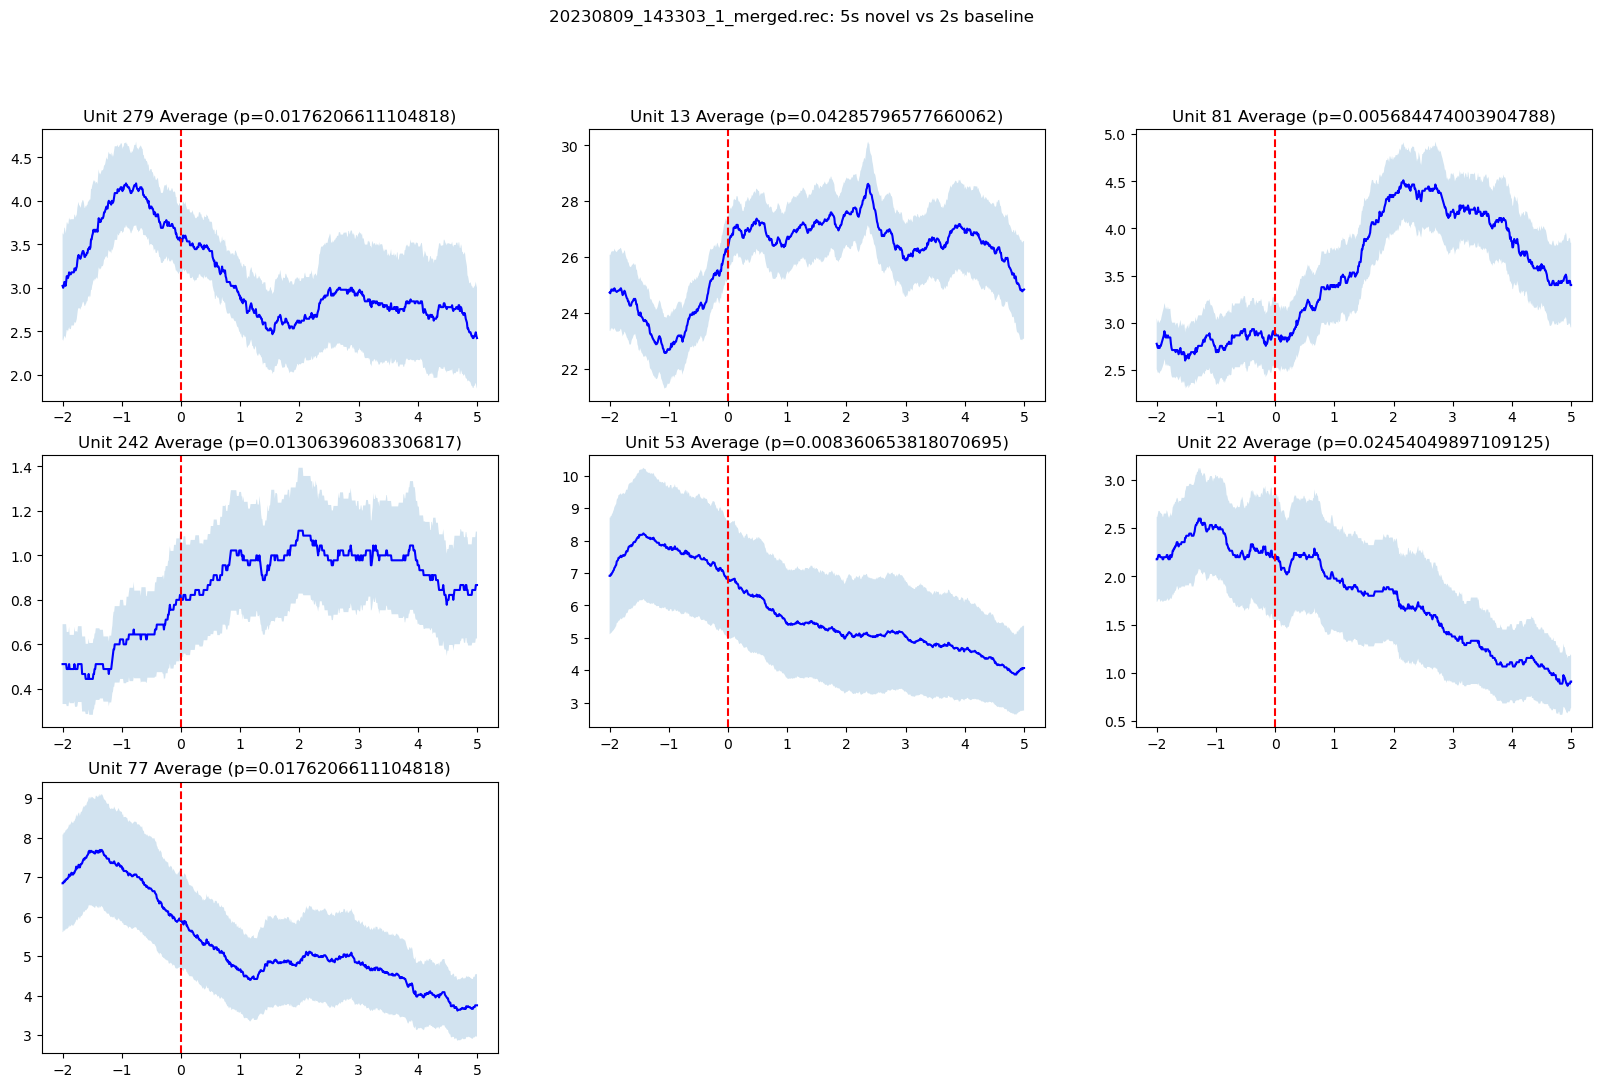

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

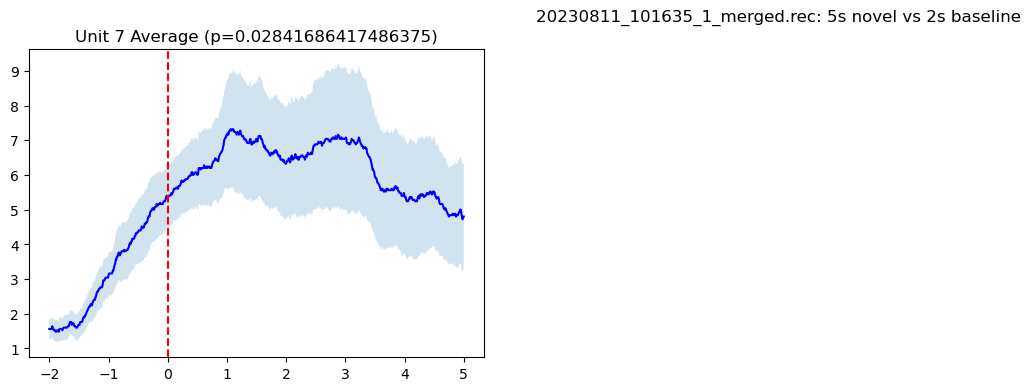

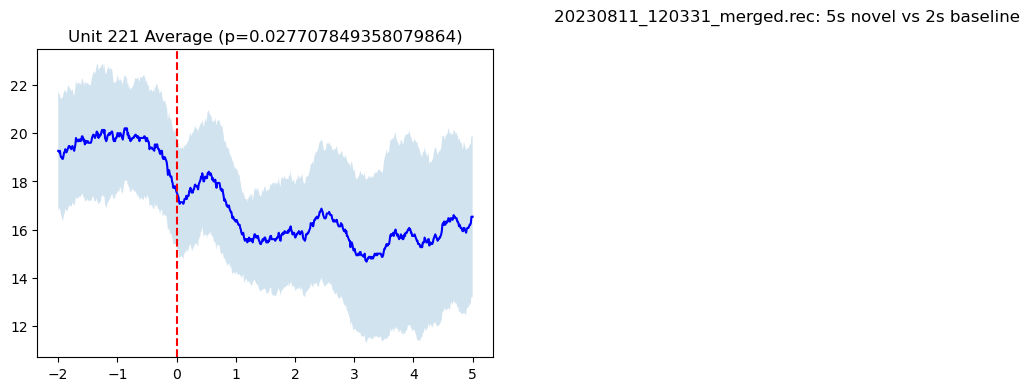

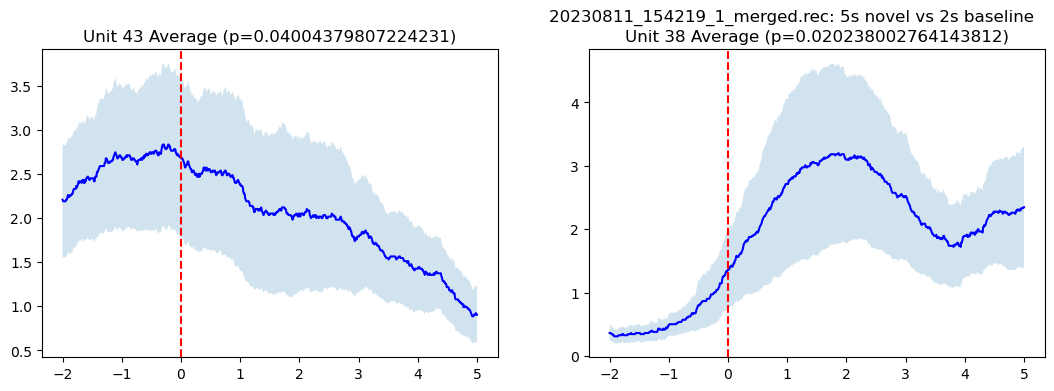

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 293            1.0  0.079616  not significant   
1                  80            5.0  0.500184  not significant   
2                 252            5.0  1.000000  not significant   
3                 211            1.0  0.079616  not significant   
4                 276            4.0  0.345231  not significant   
..                ...            ...       ...              ...   
177                76           90.0  0.144313  not significant   
178               149           86.0  0.113746  not significant   
179               135           83.0  0.157875  not significant   
180                38           55.0  0.020238        increases   
181               136          135.0  0.927298  not significant   

                        Recording Subject                    Event  
0    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
1    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
2    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
3    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
4    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
..                            ...     ...                      ...  
177  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  
178  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  
179  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  
180  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  
181  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  

[182 rows x 7 columns]

In [37]:
phase3_analysis_250sw.wilcox_baseline_v_event_collection('novel', 2, 5)